# 1. Importing libraries

In [1]:
import os

mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin'

os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [2]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
%matplotlib inline
import seaborn as sns # For easier statistical plotting
sns.set_style("whitegrid")
from scipy import stats
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



# 2. Reading the Datasets and Exploring their Structure


In [3]:
#importing training and testing dataset 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
#checking no of observations and features 
print("Train:" + str(df_train.shape))
print("Test :" + str(df_test.shape))

Train:(1460, 81)
Test :(1459, 80)


In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# sneak peak at the data and structure
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [9]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

In [10]:
categorical_features = df_train.select_dtypes(include=[np.object])
print(categorical_features.columns.size)
print(categorical_features.columns)

43
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [11]:
numeric_features = df_train.select_dtypes(include=[np.number])
print(numeric_features.columns.size)
print(numeric_features.columns)


38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


# 3. Exploratory Data Analysis

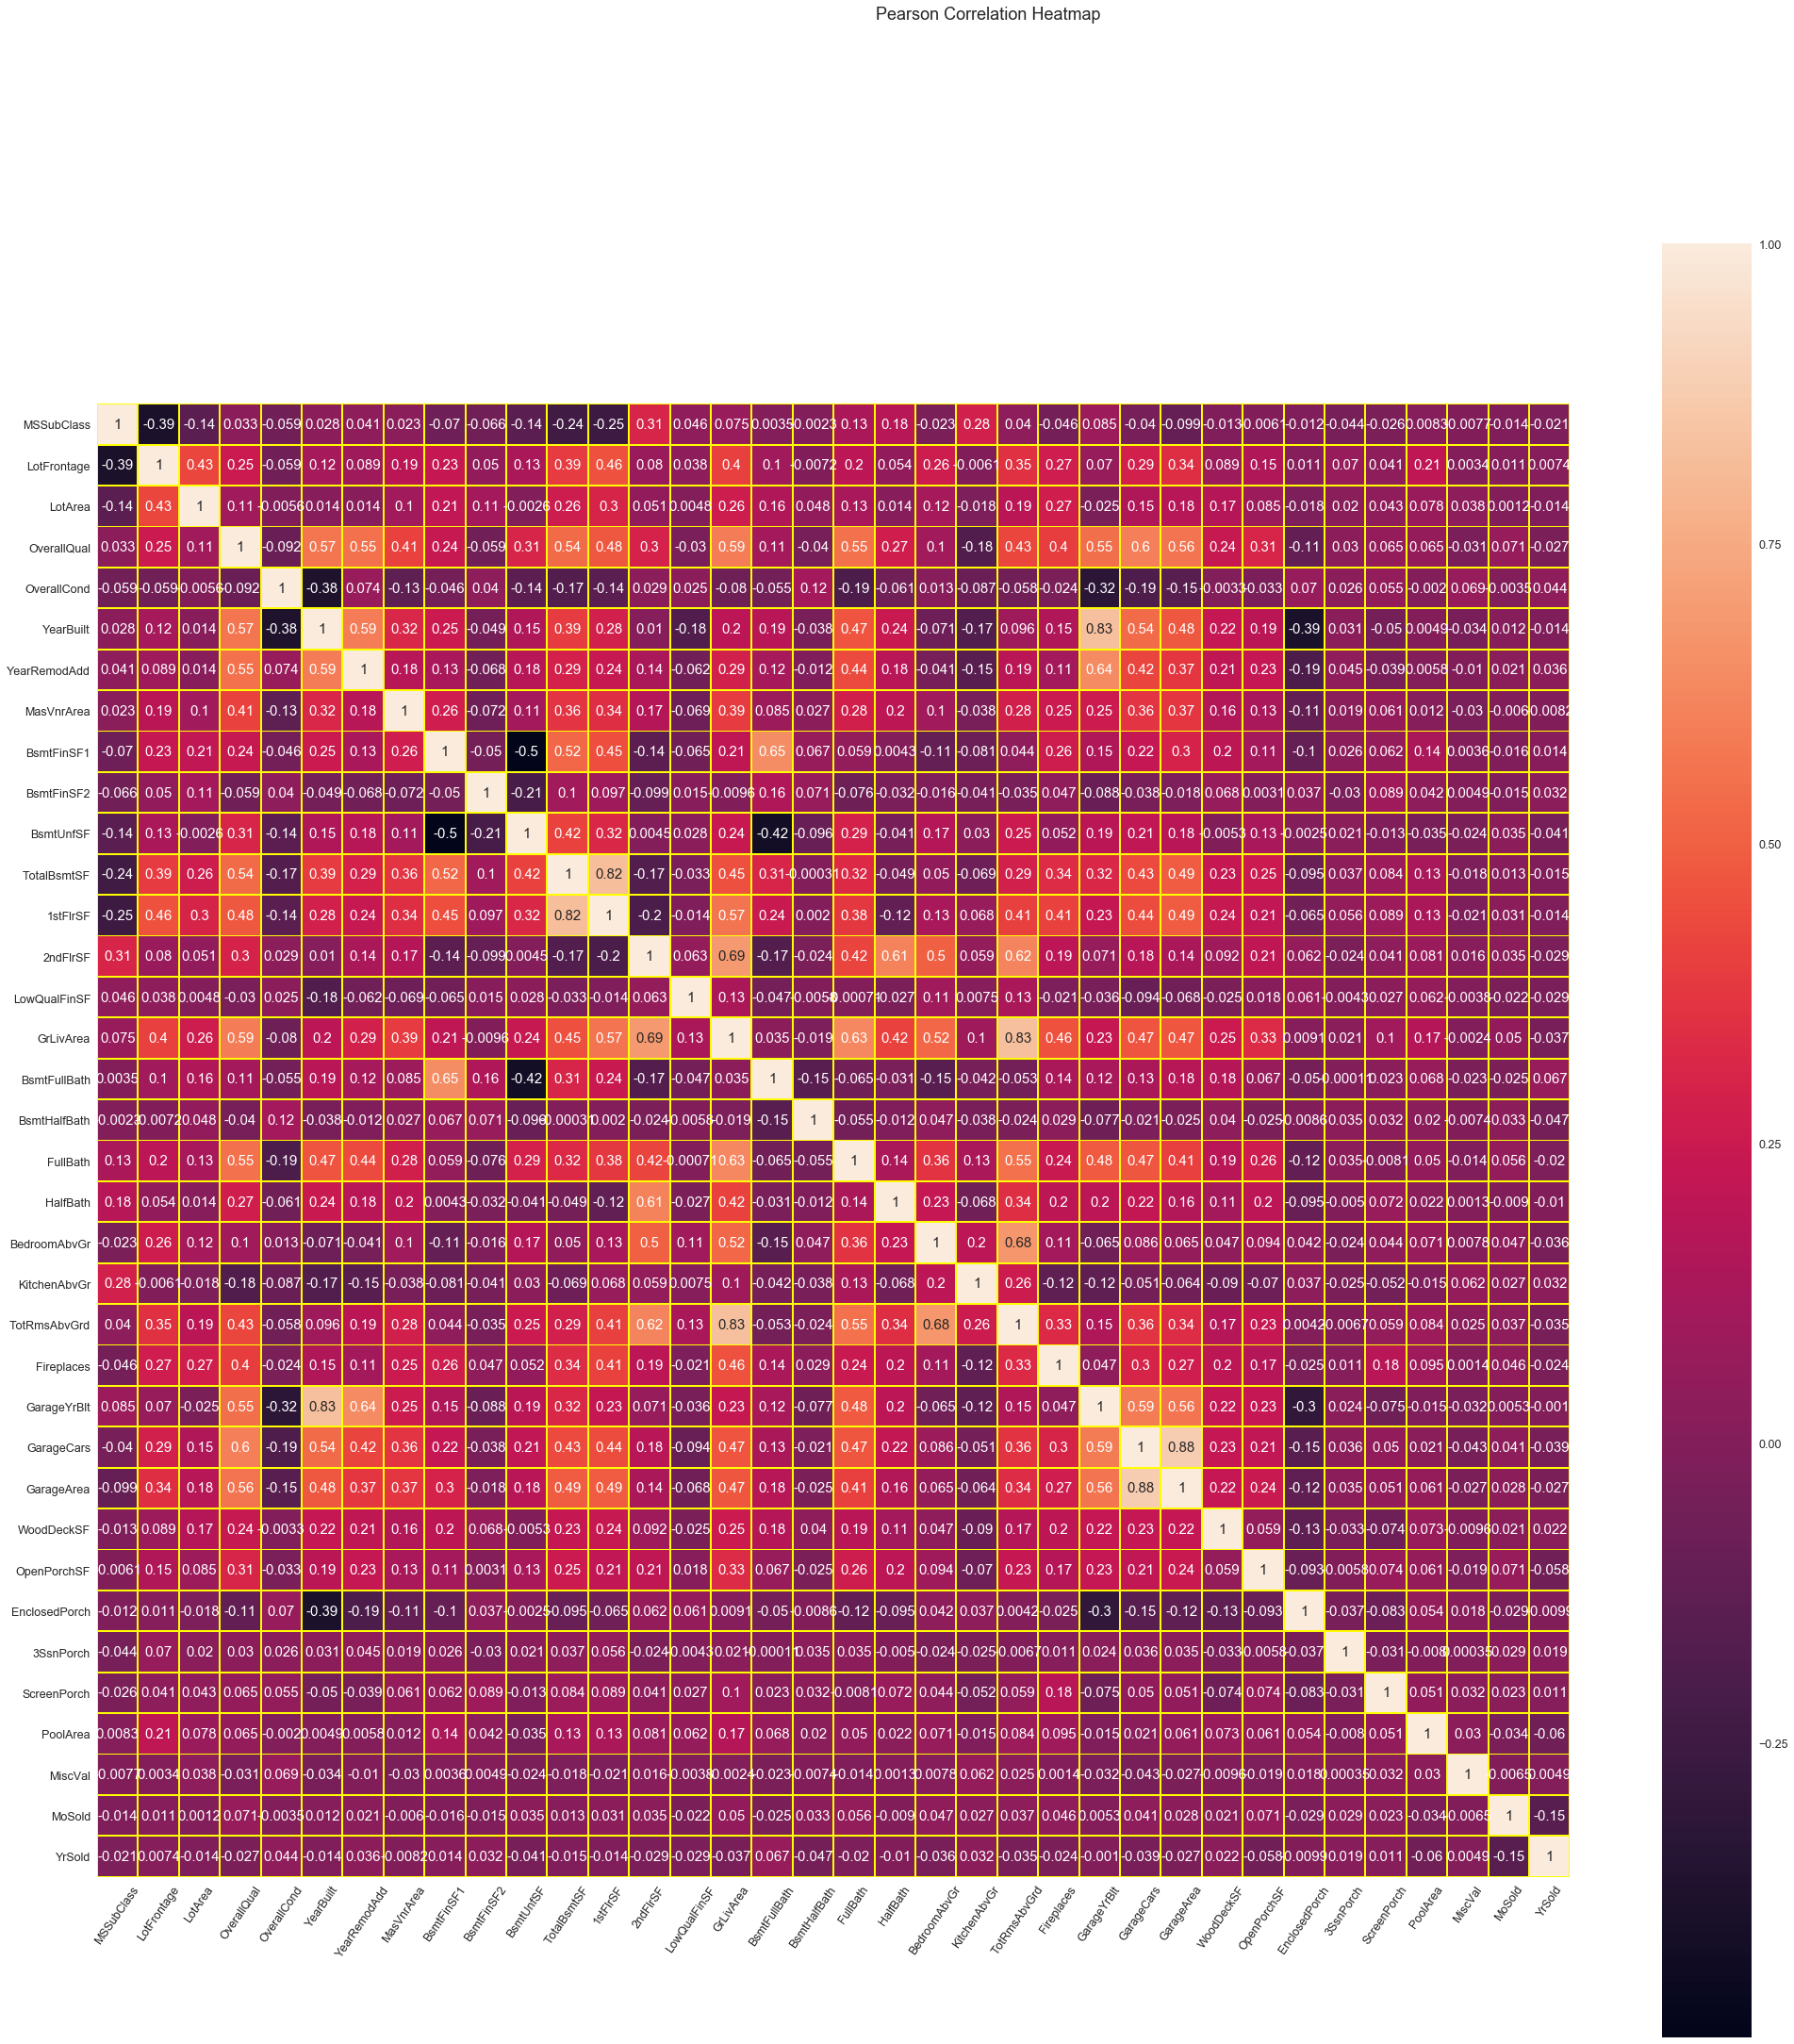

In [12]:
#Correlation matrix
plt.figure(figsize = (35,35))
sns.set(font_scale=1.25)
pd.set_option('precision', 2)
corrmat = df_train.drop(["SalePrice", "Id"], axis = 1).corr()
sns.heatmap(corrmat, annot=True,  linewidths=1, linecolor='yellow',square = True)
plt.suptitle("Pearson Correlation Heatmap")
plt.xticks(rotation = 55)
plt.show()

In [13]:
df_train["SalePrice"].describe()

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

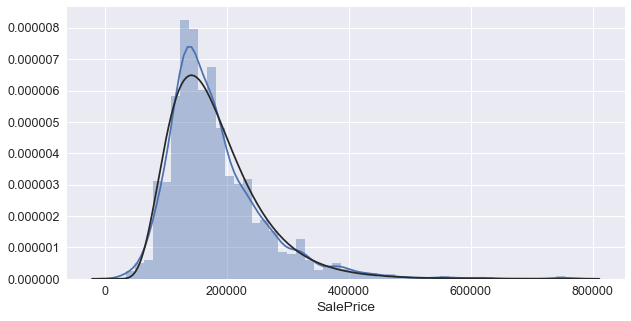

In [14]:
 plt.figure(figsize = (10,5))
sns.distplot(df_train["SalePrice"], fit = stats.lognorm)

In [15]:
#skewness and kurtosis
print(df_train["SalePrice"].skew())
print(df_train["SalePrice"].kurt())

1.8828757597682129
6.536281860064529


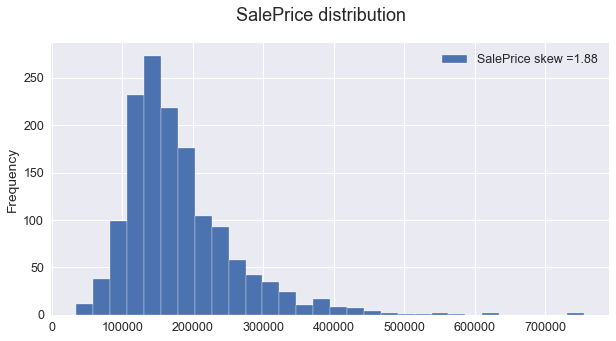

In [16]:
skewness = df_train["SalePrice"].skew()
plt.figure(figsize = (10,5))
df_train["SalePrice"].plot.hist(edgecolor = 'white',bins = 30, label = 'SalePrice skew ='+ str(round(skewness,2)))
plt.suptitle("SalePrice distribution")
plt.legend()
plt.show()

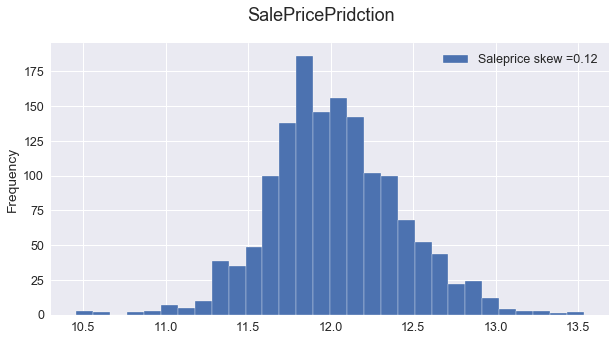

In [17]:
skewness = np.log(df_train["SalePrice"]).skew()
plt.figure(figsize = (10,5))
np.log(df_train["SalePrice"]).plot.hist(edgecolor = "white", bins = 30, label = "Saleprice skew =" + str(round(skewness, 2)))
plt.suptitle("SalePricePridction")
plt.legend()
plt.show()

OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
GarageArea      0.62
TotalBsmtSF     0.61
1stFlrSF        0.61
FullBath        0.56
TotRmsAbvGrd    0.53
YearBuilt       0.52
YearRemodAdd    0.51
Name: SalePrice, dtype: float64


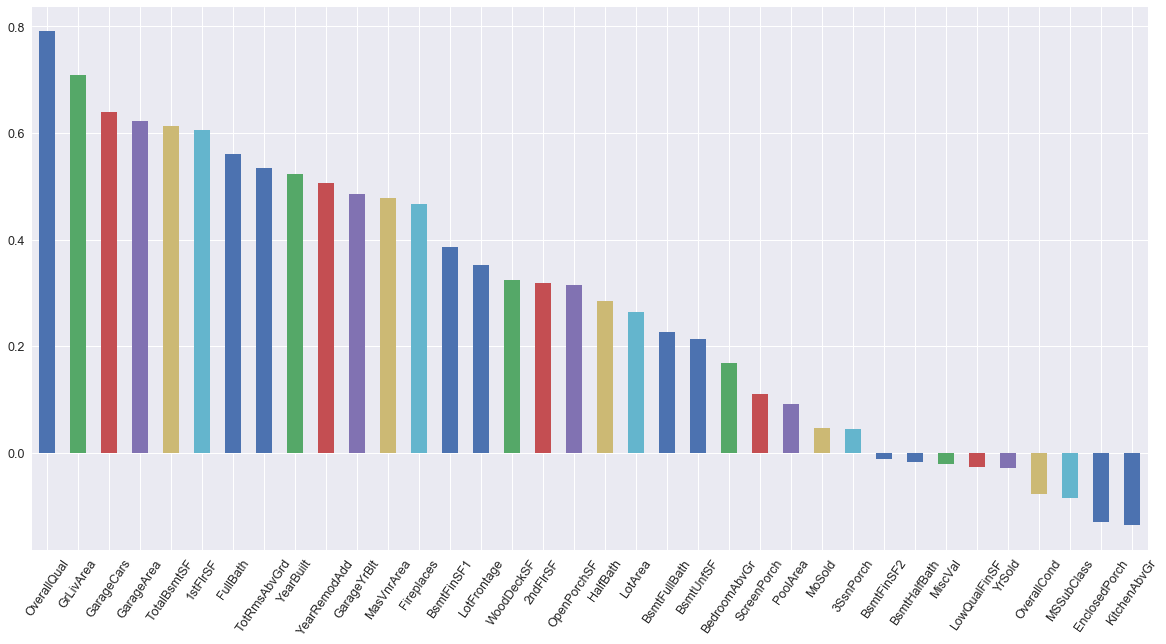

In [18]:
#correlation with SalePrice
plt.figure(figsize = (20,10))

corr_with_salePrice = df_train.drop(["Id"], axis =1).corr()["SalePrice"].sort_values(ascending = False)
print(corr_with_salePrice.drop(["SalePrice"]).head(10))
corr_with_salePrice.drop(["SalePrice"]).plot.bar()
plt.xticks(rotation =55)
plt.show()

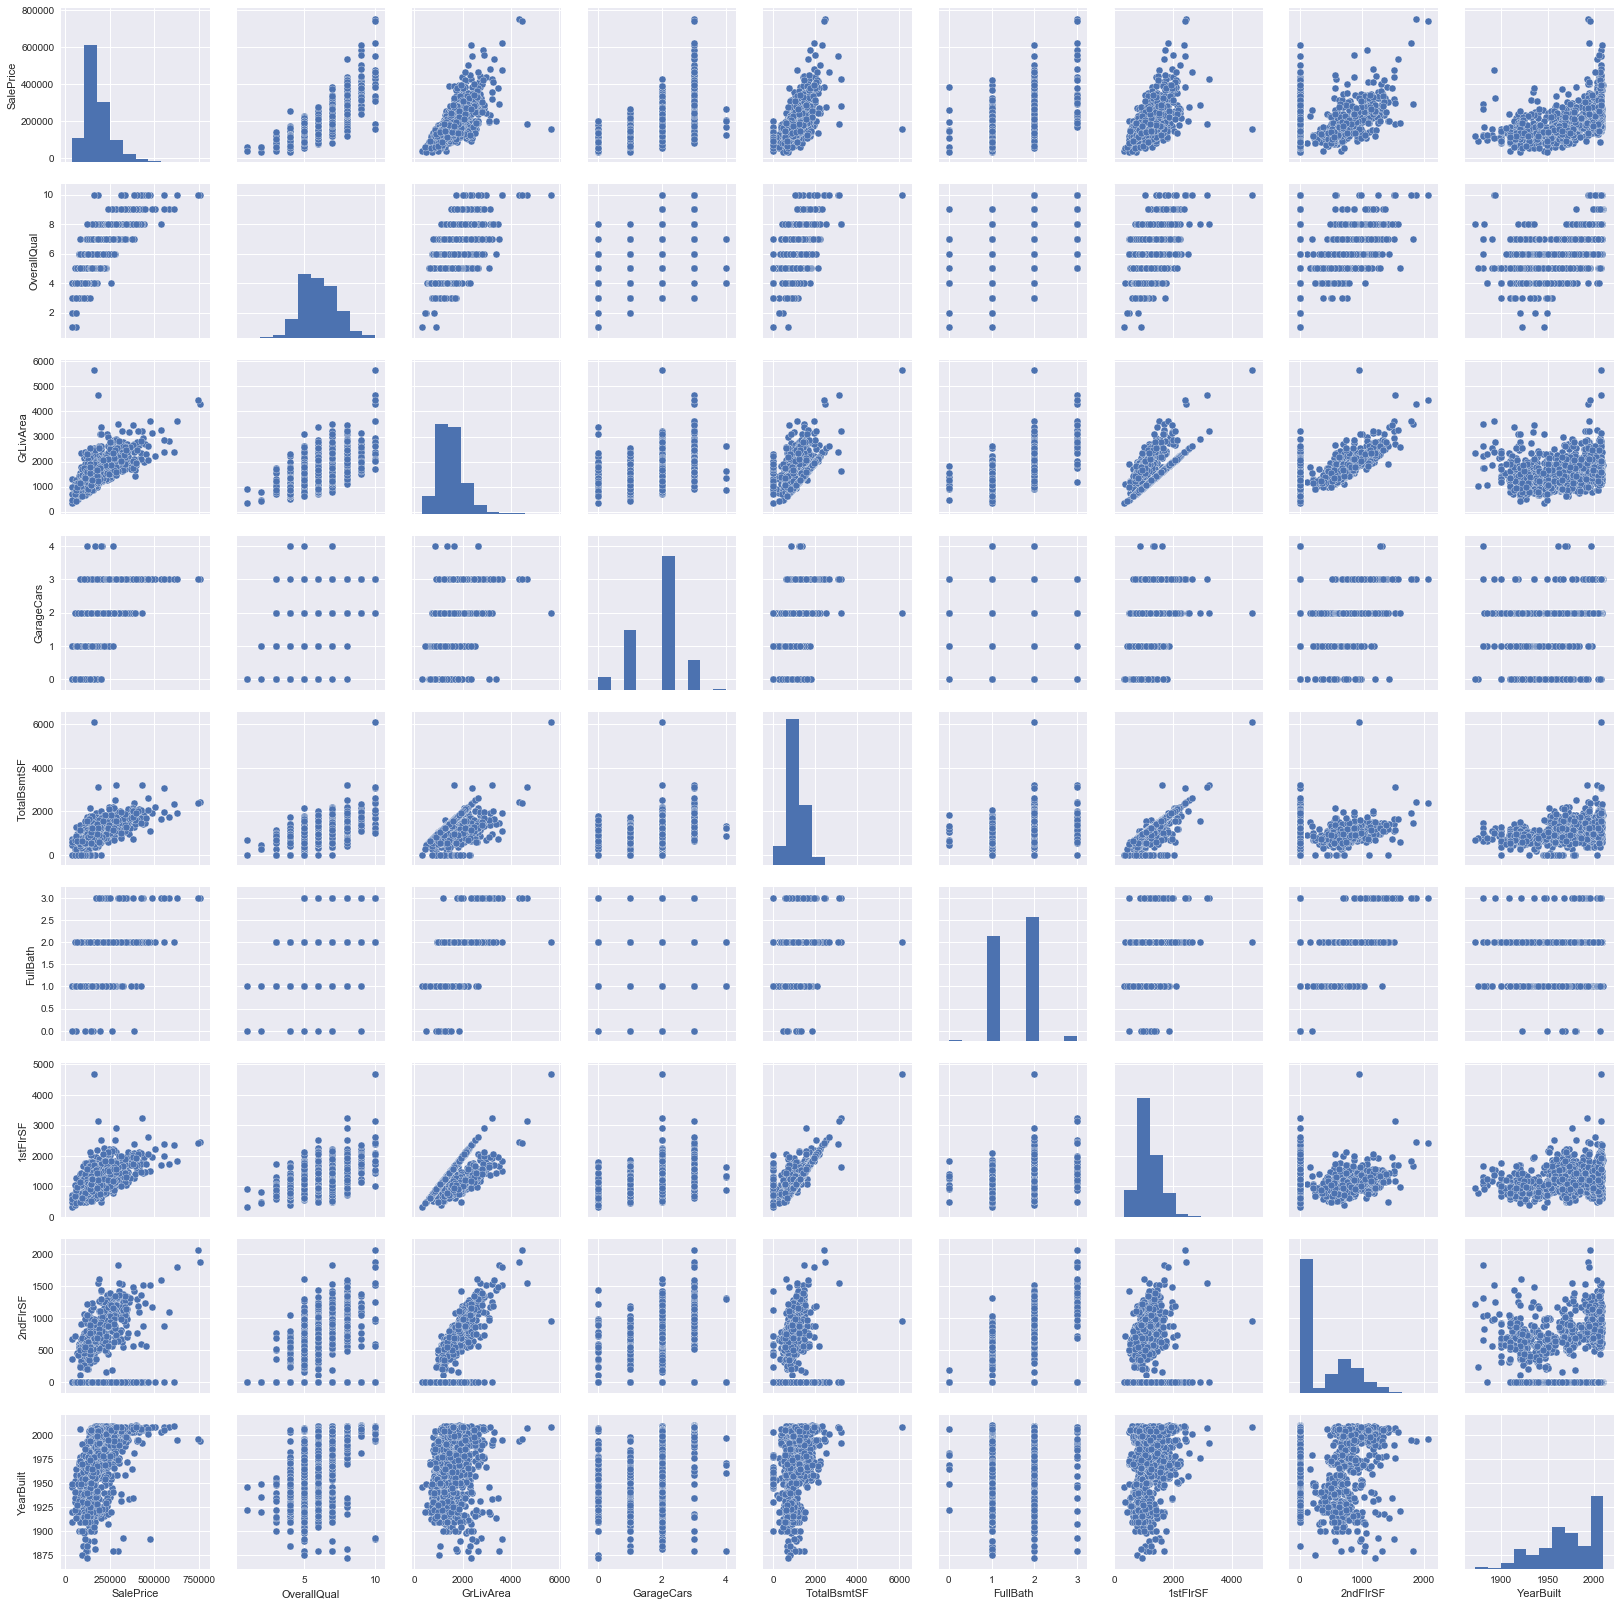

In [19]:
#scatterplot of correlated features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', "1stFlrSF", "2ndFlrSF",'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

MiscVal          24.48
PoolArea         14.83
LotArea          12.21
3SsnPorch        10.30
LowQualFinSF      9.01
KitchenAbvGr      4.49
BsmtFinSF2        4.26
ScreenPorch       4.12
BsmtHalfBath      4.10
EnclosedPorch     3.09
MasVnrArea        2.67
OpenPorchSF       2.36
LotFrontage       2.16
SalePrice         1.88
BsmtFinSF1        1.69
WoodDeckSF        1.54
TotalBsmtSF       1.52
MSSubClass        1.41
1stFlrSF          1.38
GrLivArea         1.37
dtype: float64


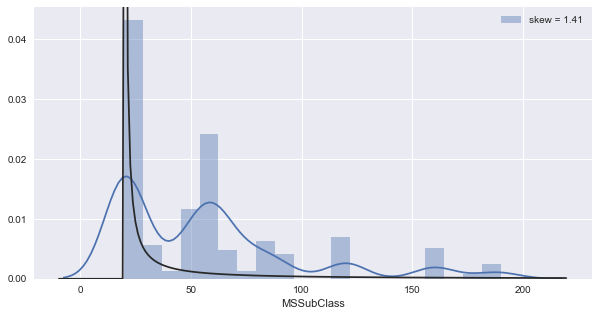

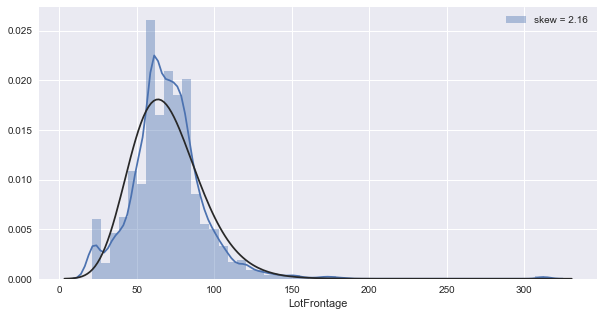

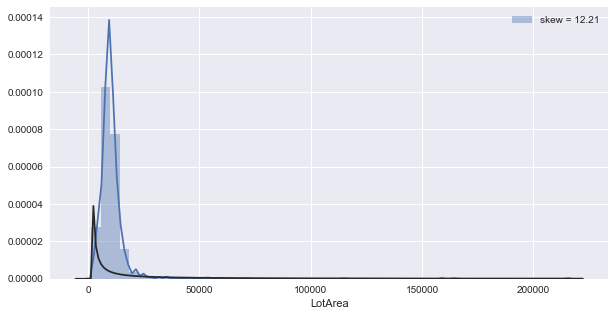

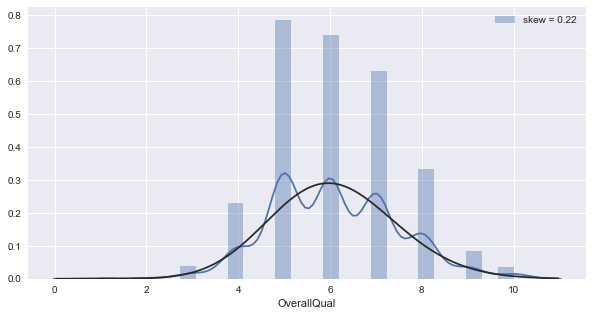

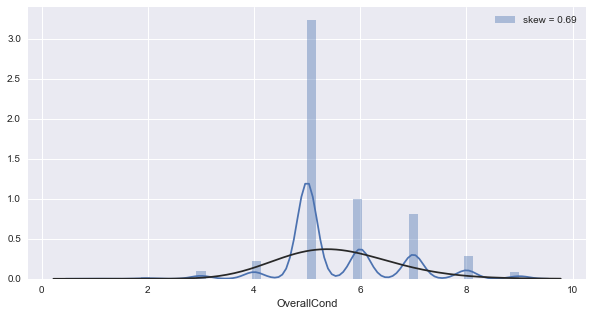

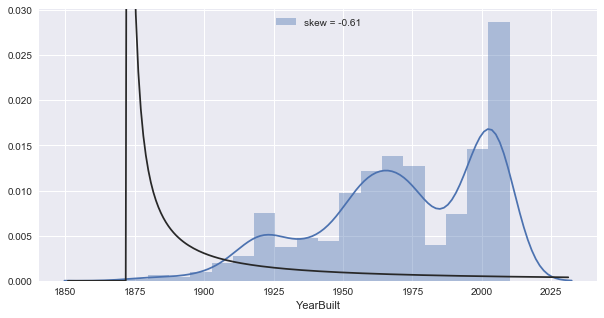

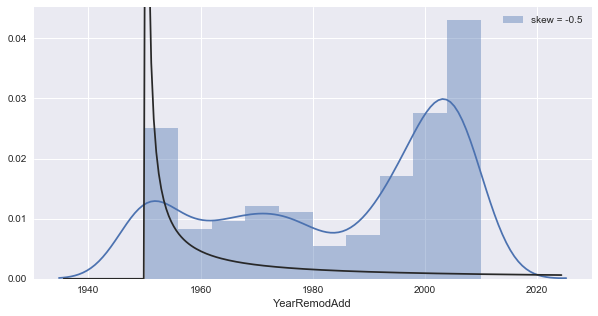

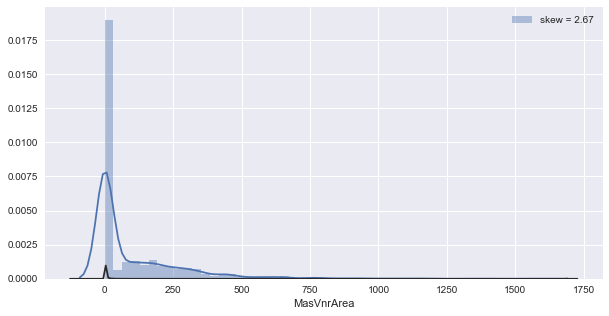

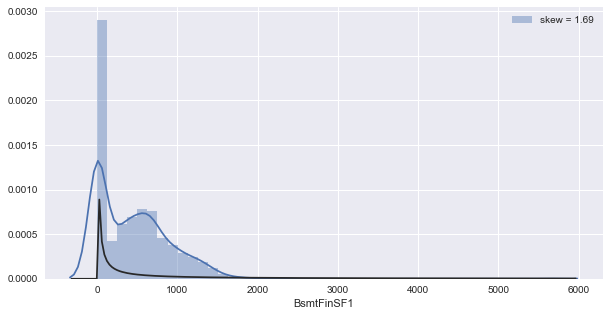

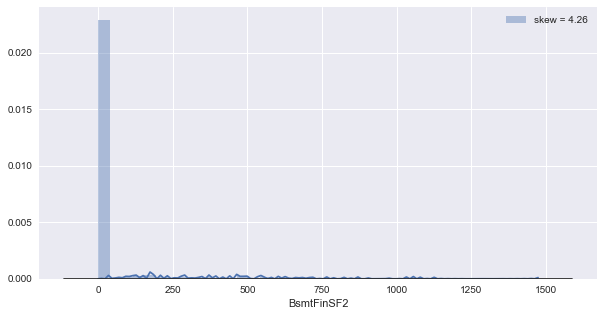

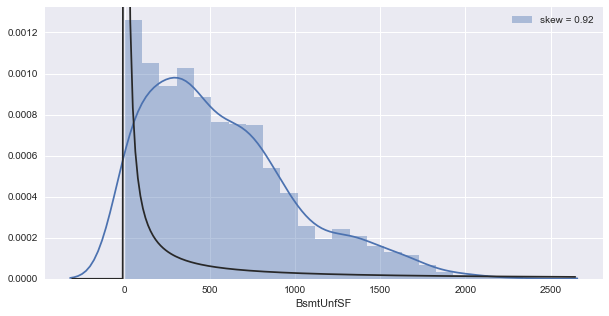

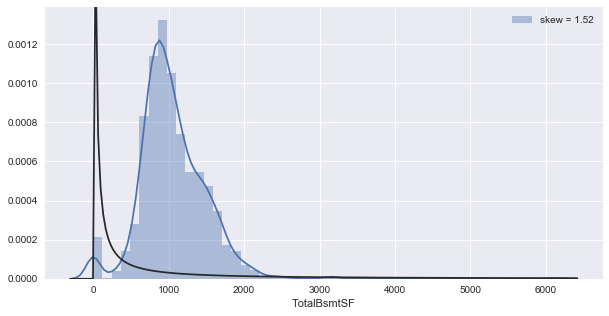

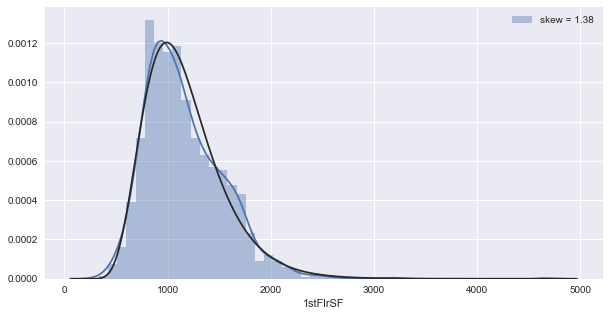

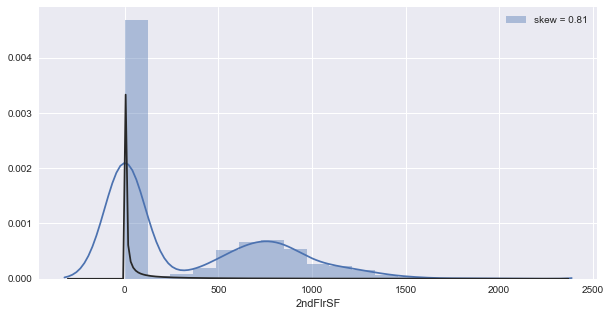

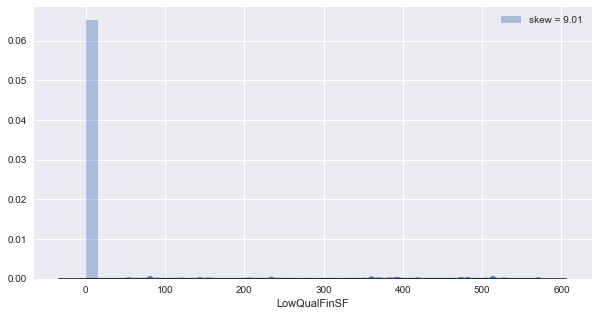

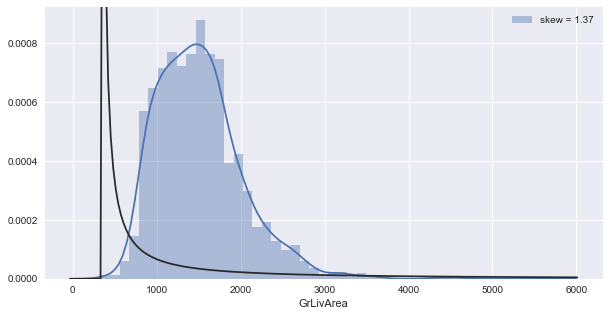

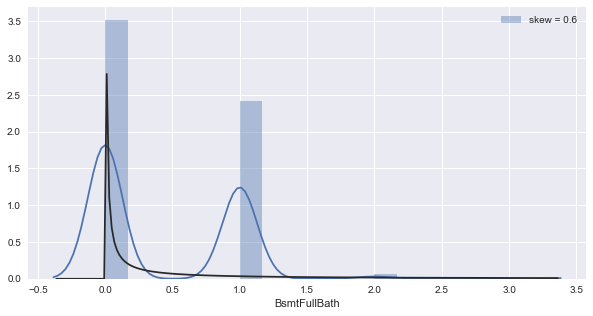

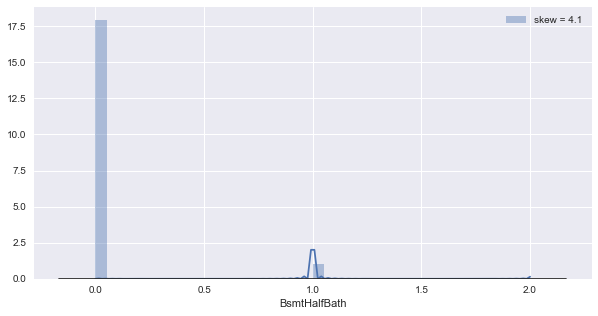

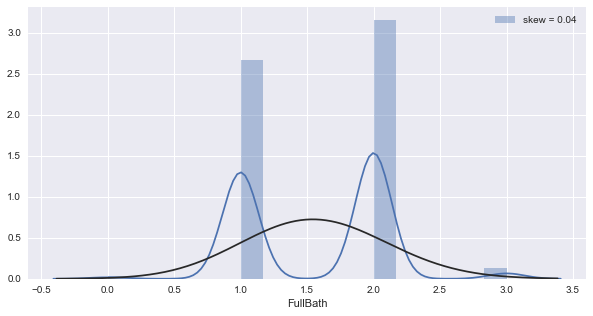

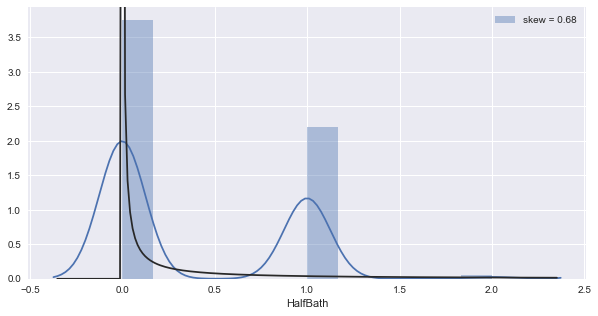

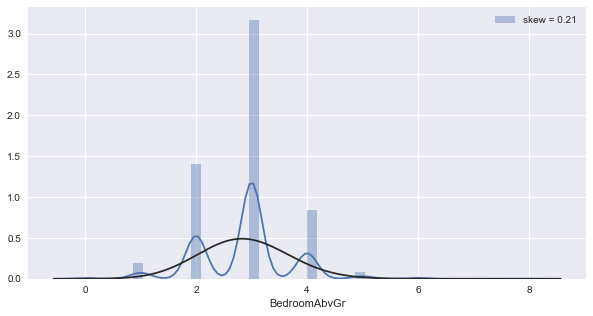

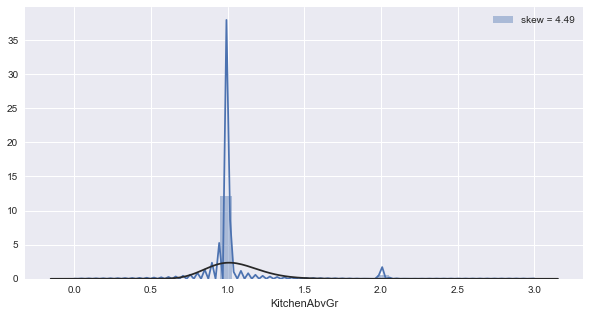

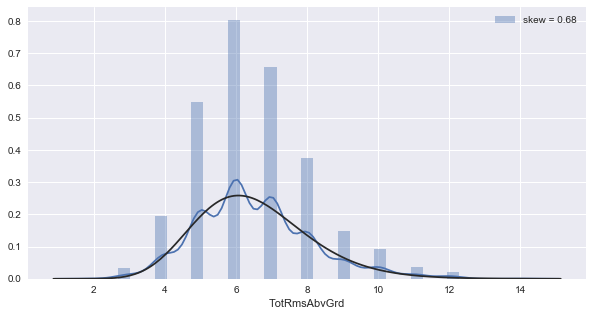

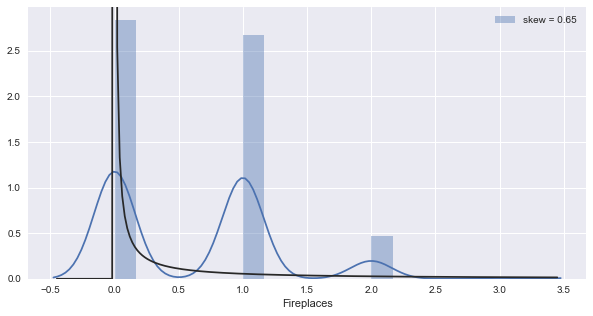

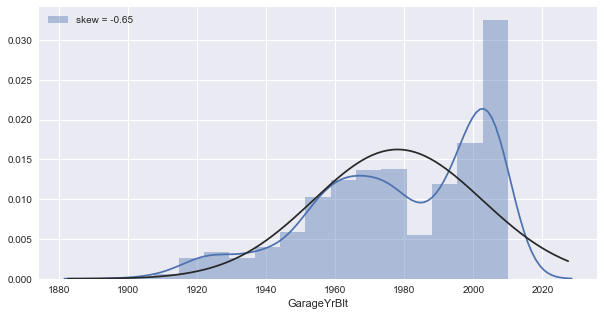

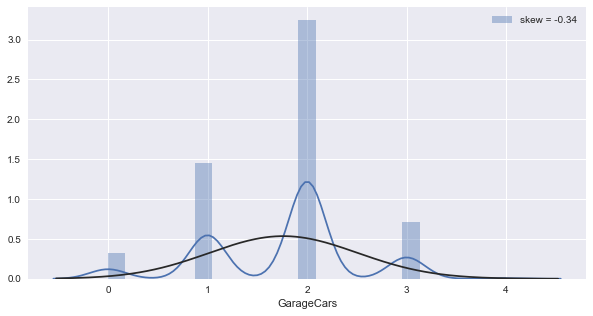

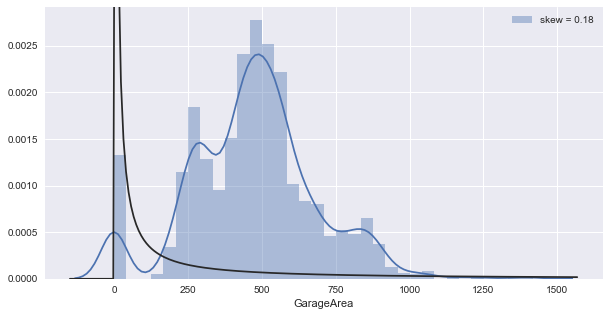

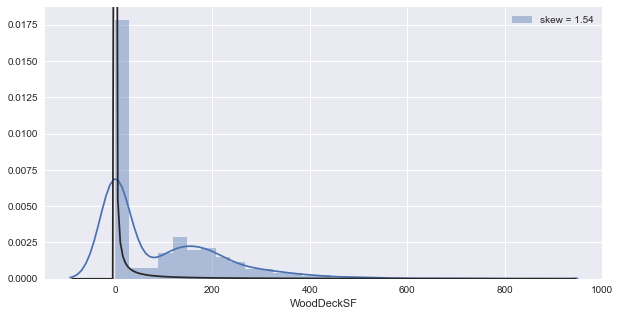

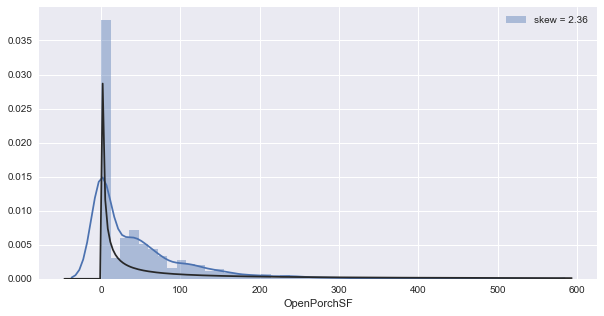

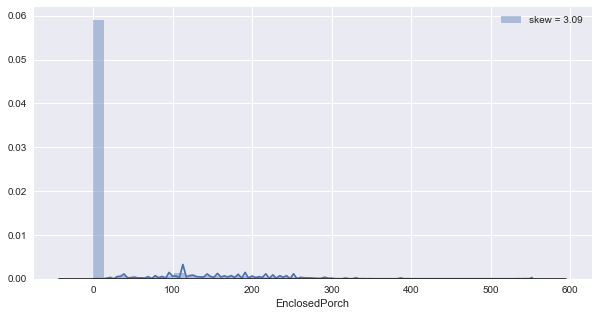

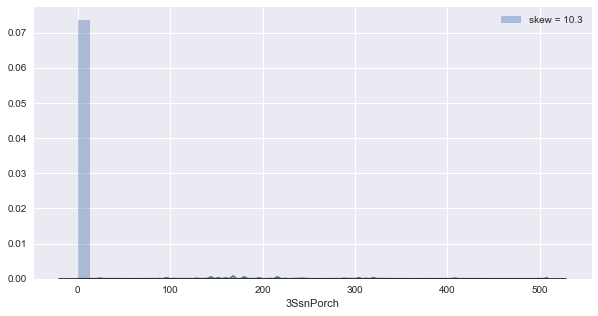

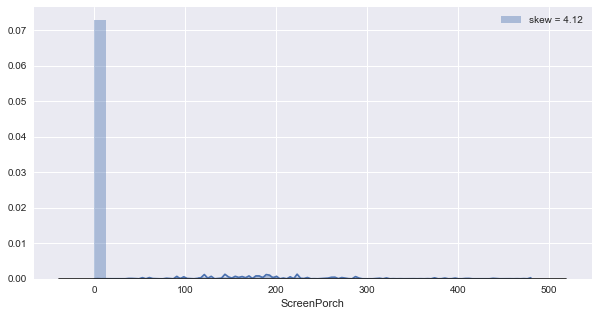

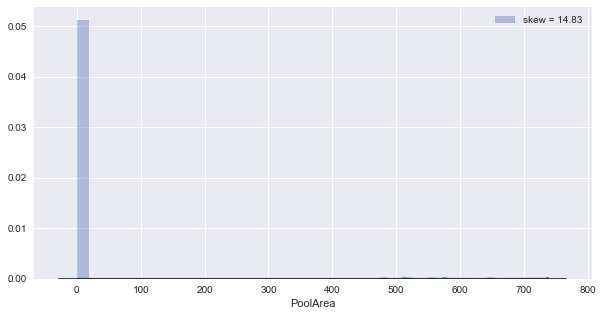

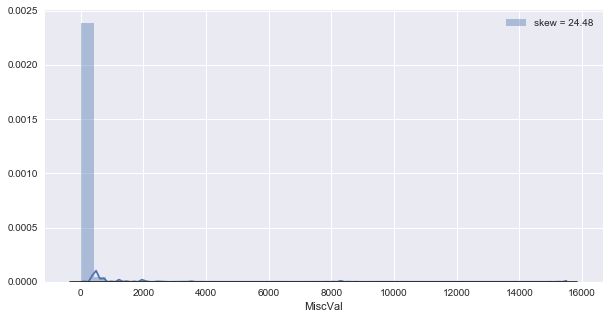

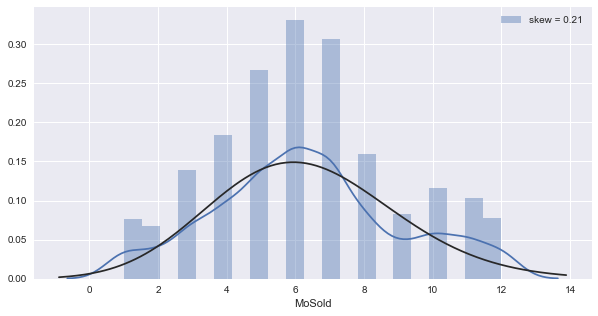

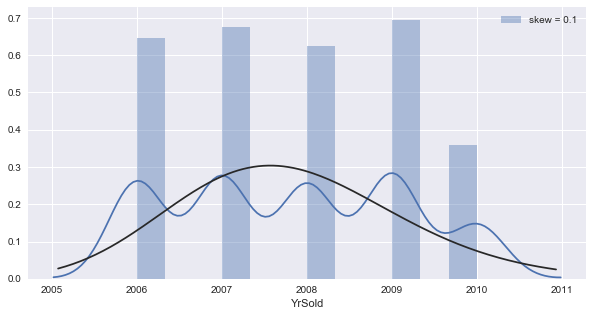

In [20]:
# distribution of Numeric Data
skews = numeric_features.drop(["Id"], axis=1).skew()
print(skews.sort_values(ascending = False).head(20))

for col in numeric_features.drop(["Id","SalePrice"], axis=1).columns.tolist():
        plt.figure(figsize = (10,5))
        sns.distplot(df_train[col].dropna(), fit = stats.lognorm, label="skew = " + str(round(skews[col],2)) )
        plt.legend()
        plt.show()

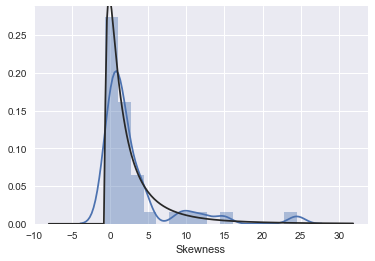

In [21]:
sns.distplot(numeric_features.drop(["Id"], axis = 1).skew(),fit = stats.lognorm, axlabel= "Skewness")

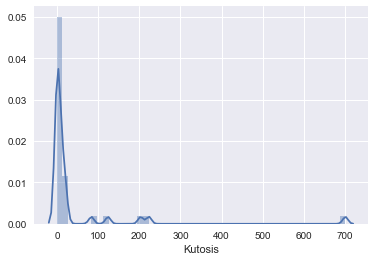

In [22]:
sns.distplot(numeric_features.drop(["Id"], axis = 1).kurt(), axlabel= "Kutosis")

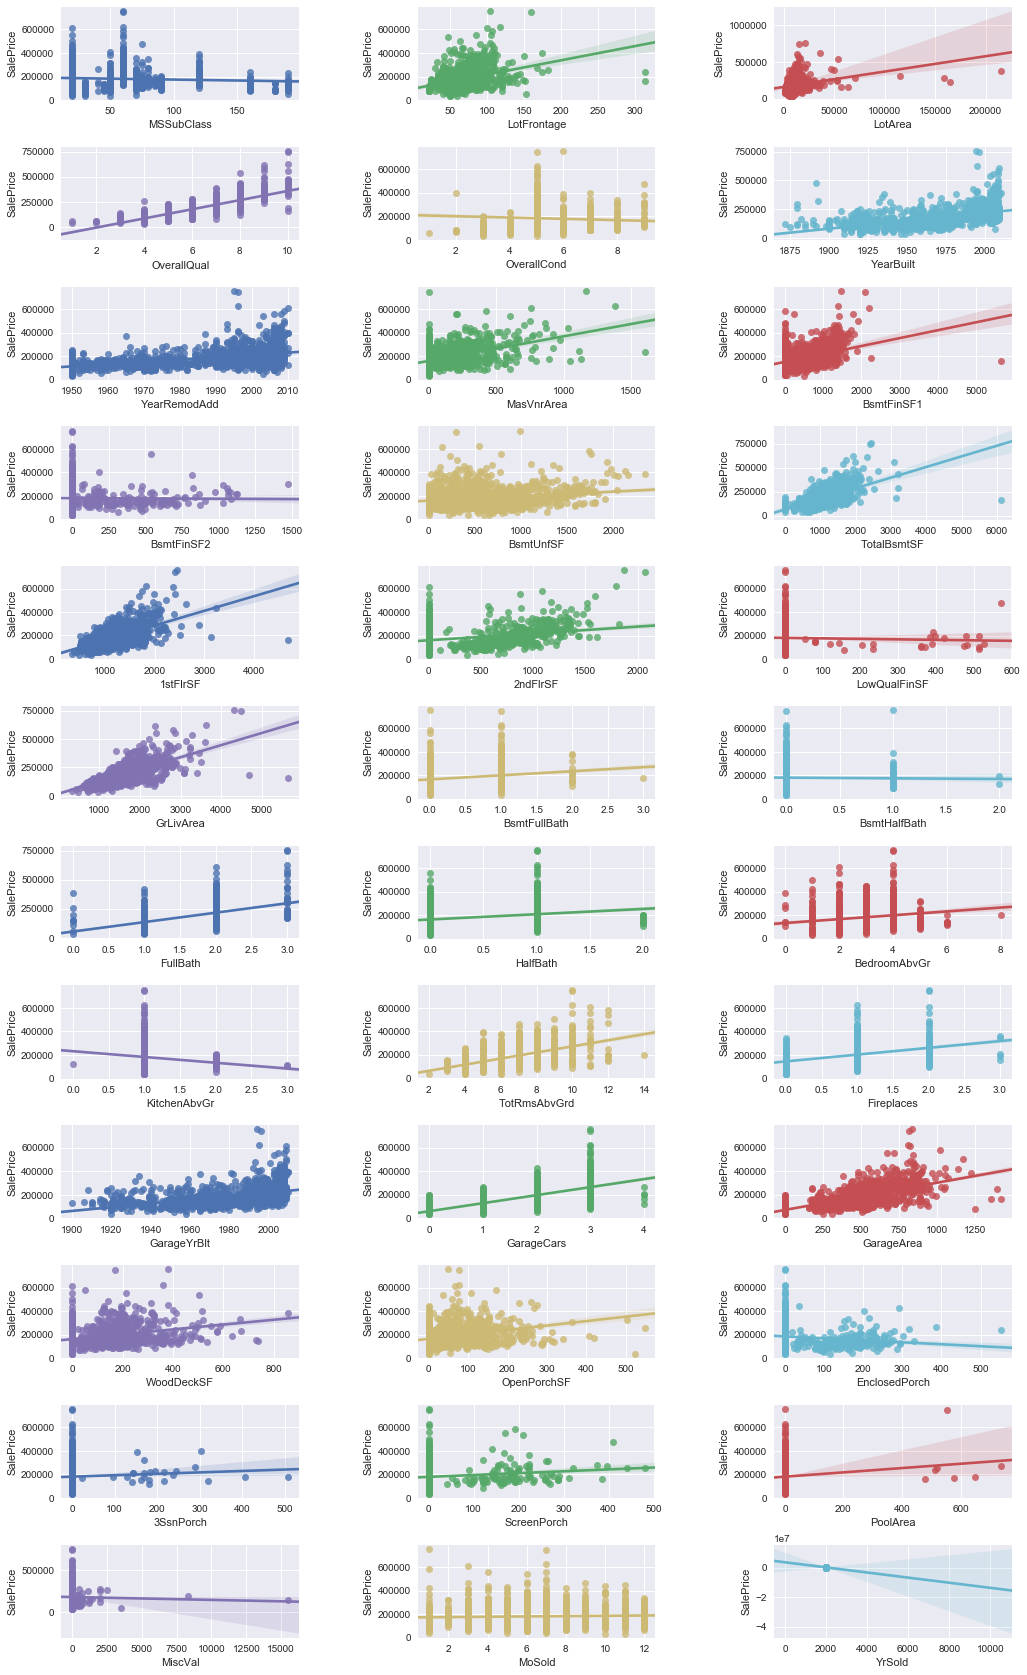

In [23]:
fig, axs = plt.subplots(12,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(numeric_features.drop(["Id", "SalePrice"], axis = 1).columns):
        sns.regplot(numeric_features[col],df_train['SalePrice'], fit_reg = True, ax = axs[ind])

plt.show()

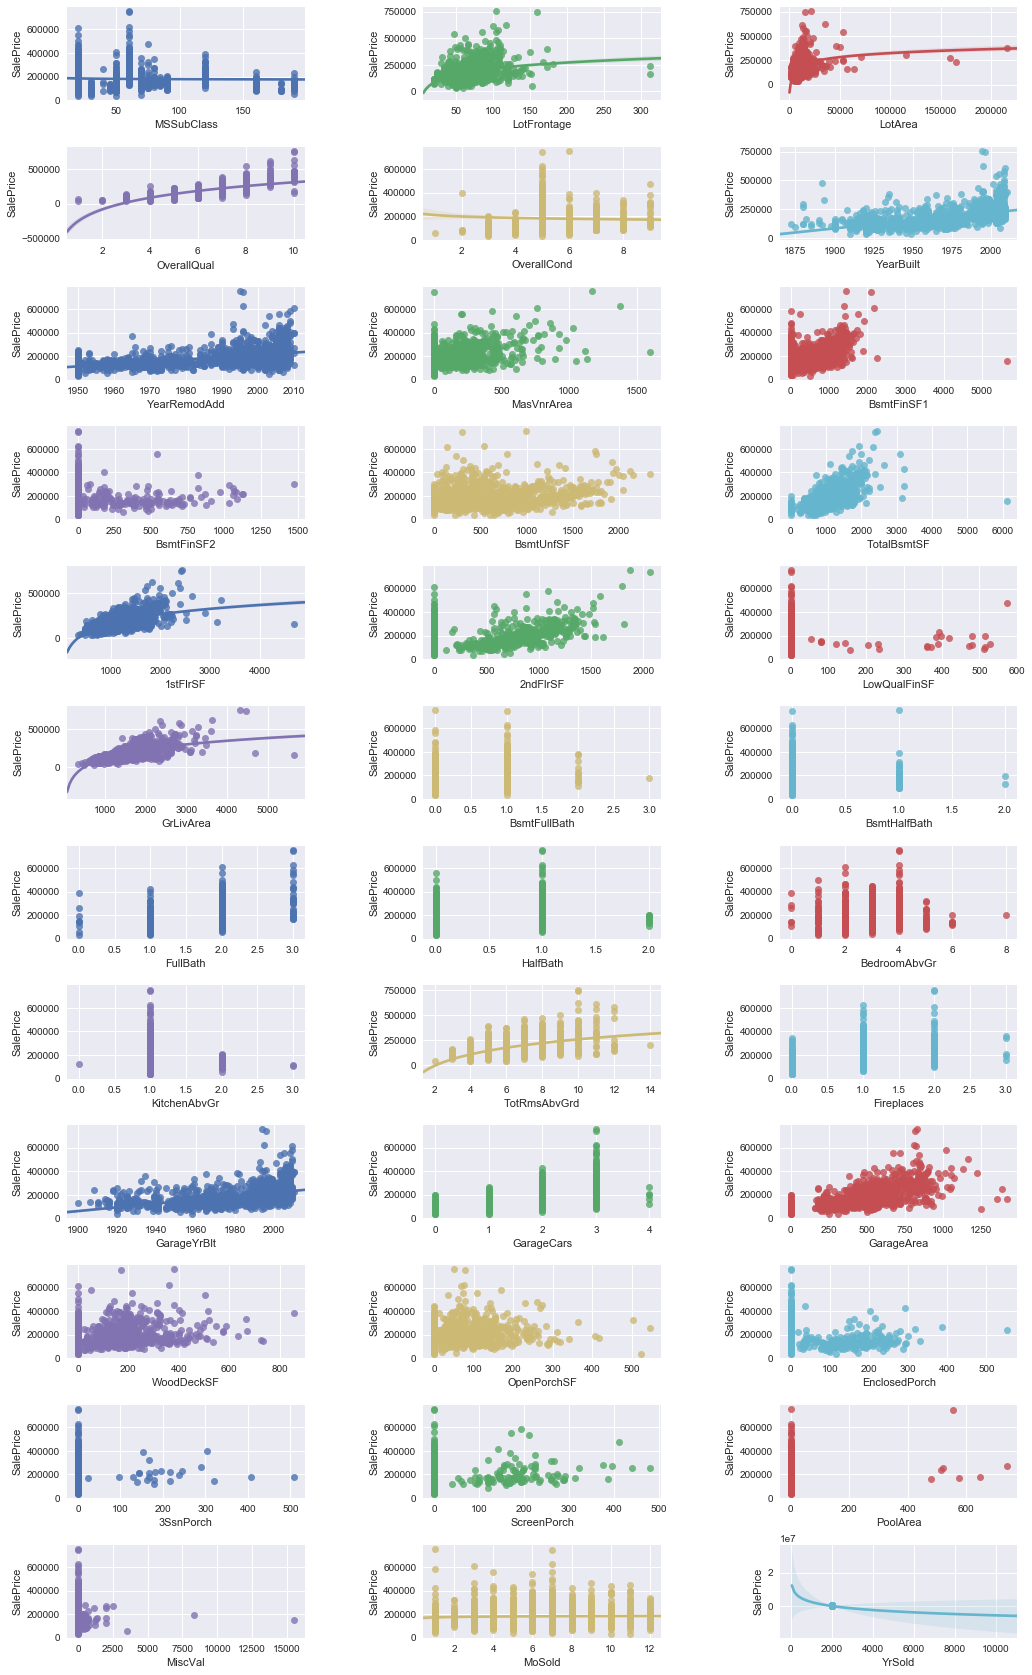

In [24]:
# y = log(x) regression plot
fig, axs = plt.subplots(12,3, figsize=(16, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.5, right=0.95)

axs = axs.ravel()

for ind, col in enumerate(numeric_features.drop(["Id", "SalePrice"], axis = 1).columns):
        sns.regplot(numeric_features[col],df_train['SalePrice'], logx = True,fit_reg = True, ax = axs[ind])

plt.show()

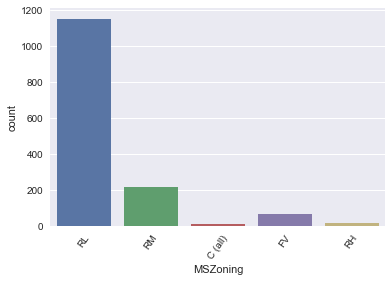

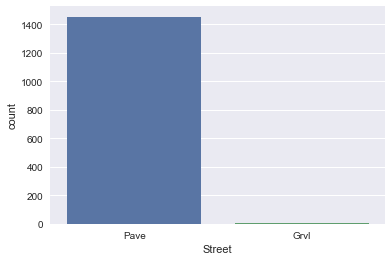

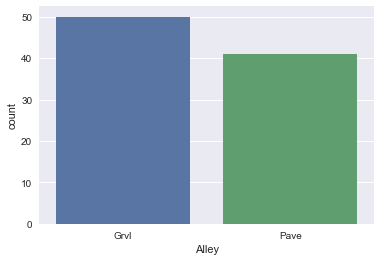

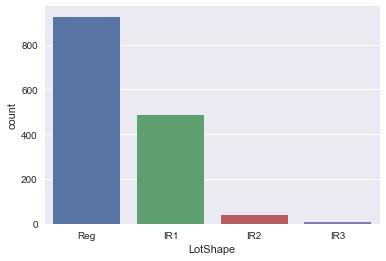

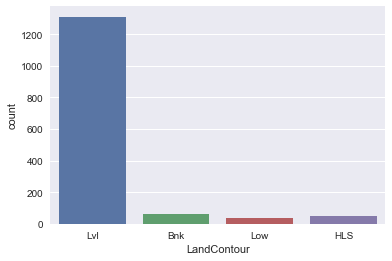

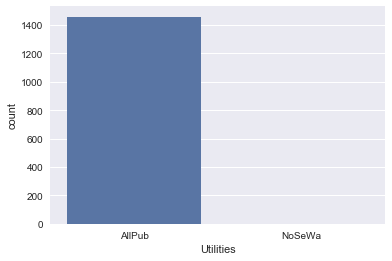

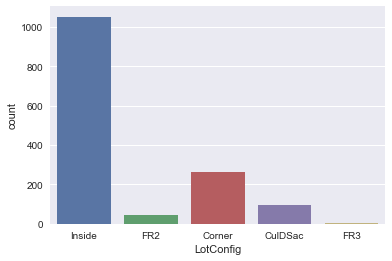

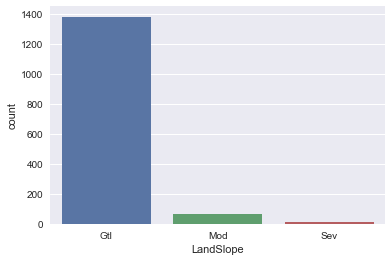

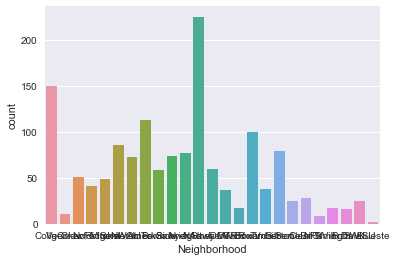

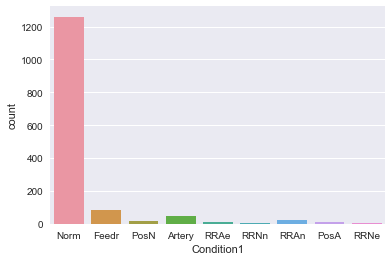

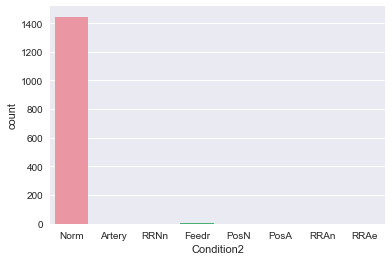

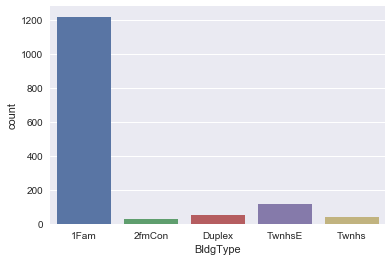

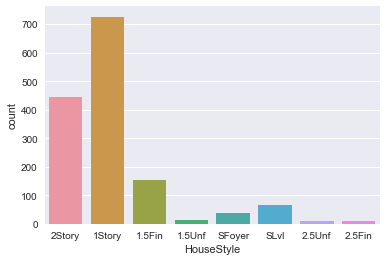

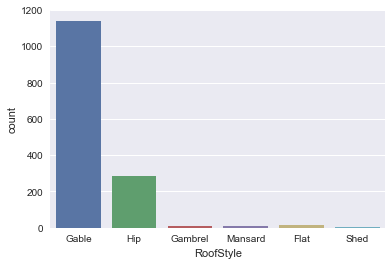

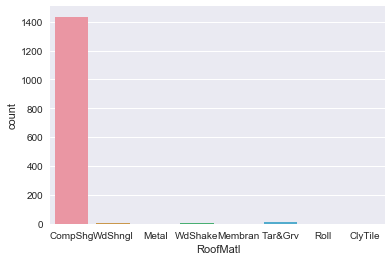

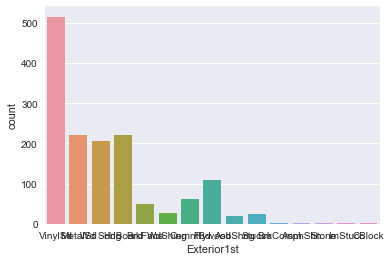

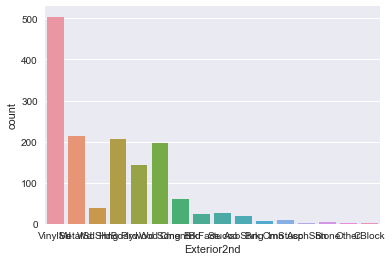

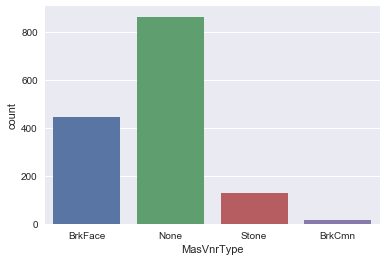

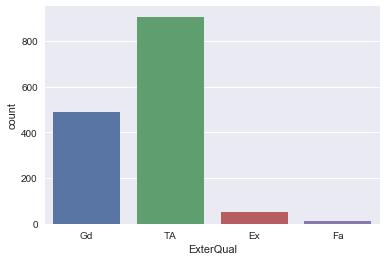

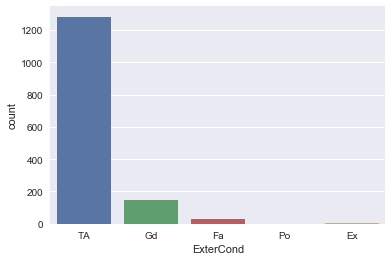

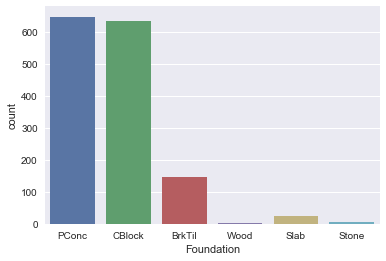

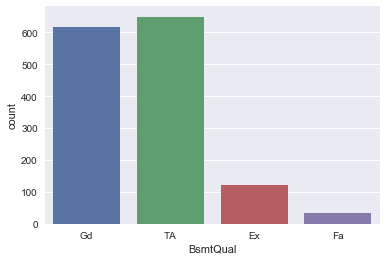

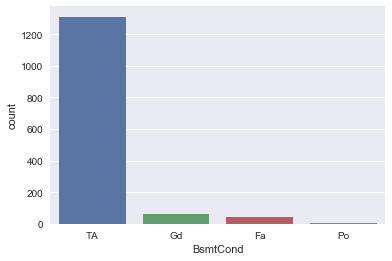

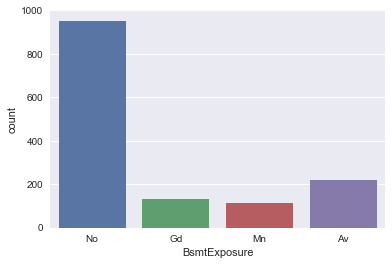

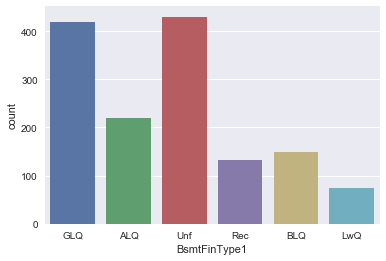

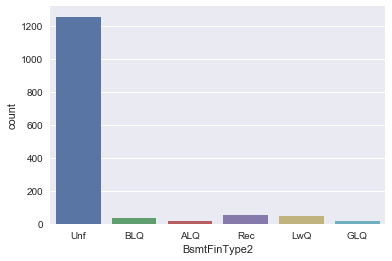

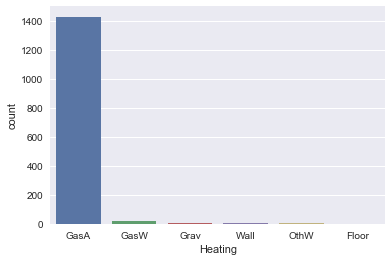

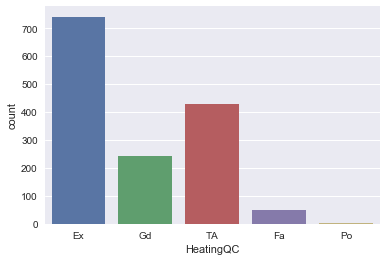

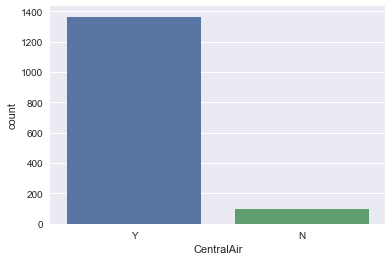

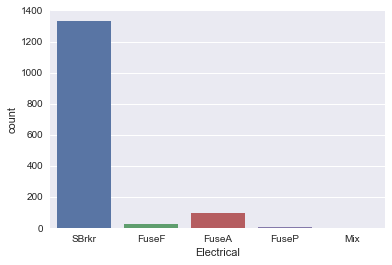

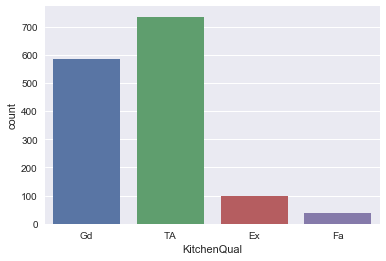

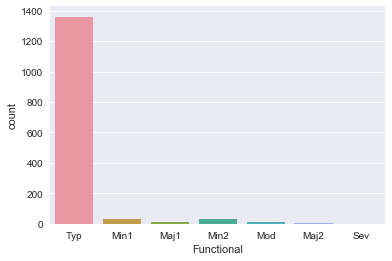

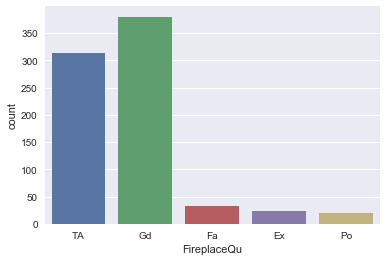

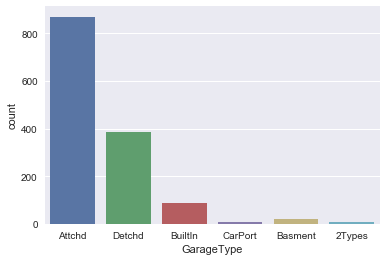

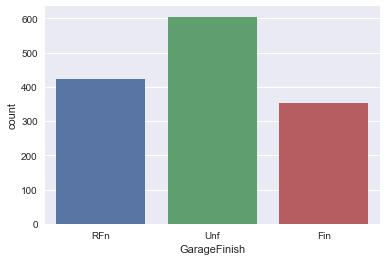

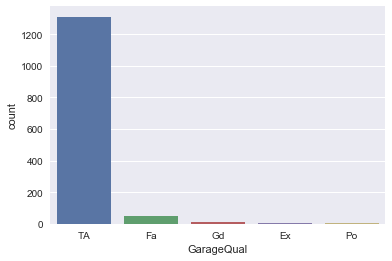

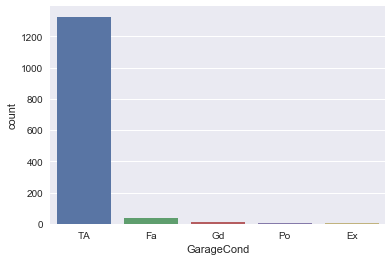

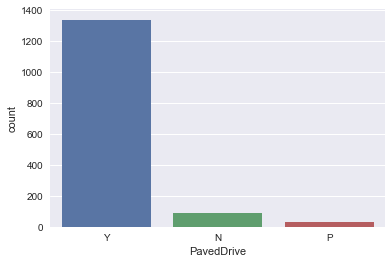

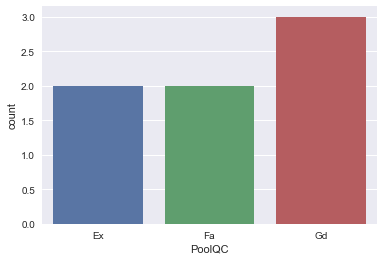

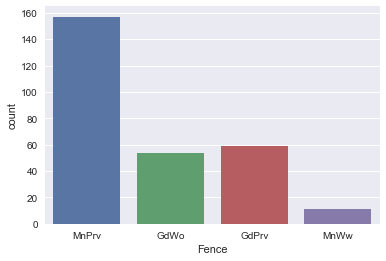

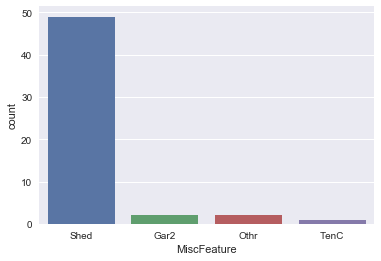

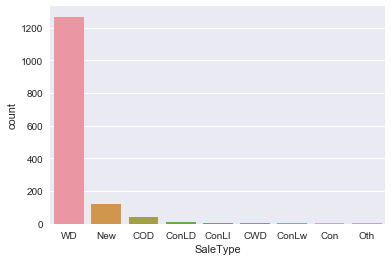

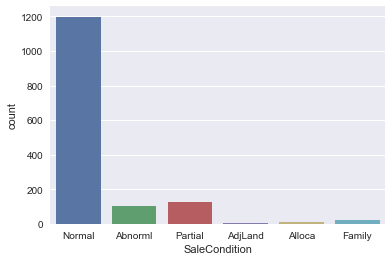

In [25]:
#Distribution of categorical data
plt.xticks(rotation = 55)
for col in df_train.columns.tolist():
    if df_train[col].dtype == 'object':
        sns.countplot(col, data = df_train)
        plt.show()

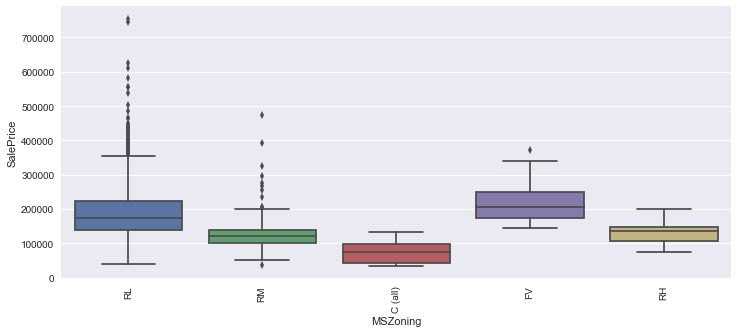

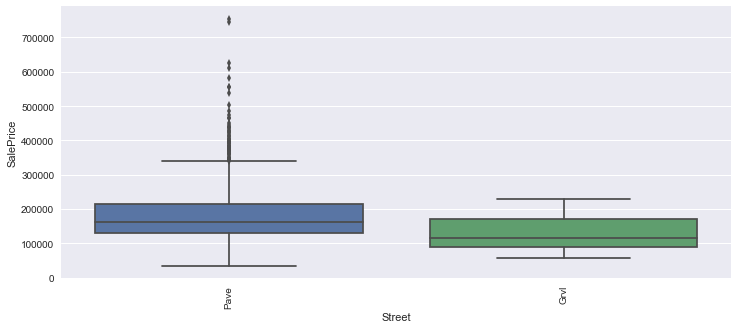

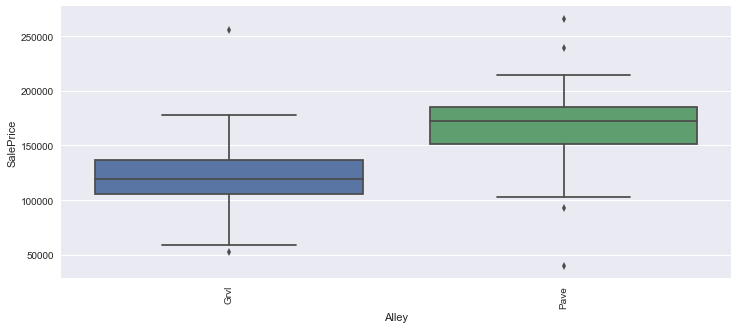

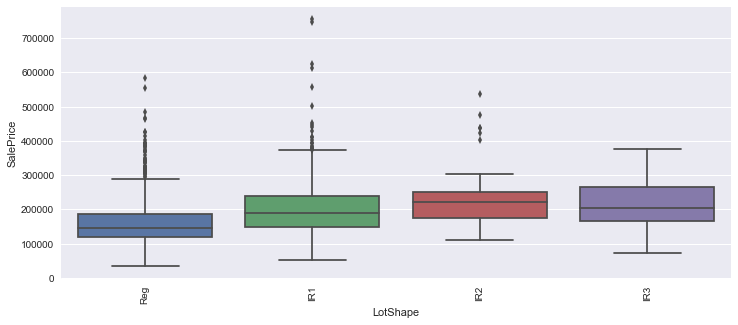

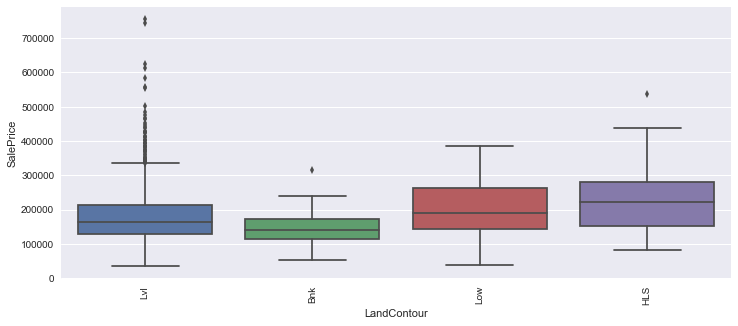

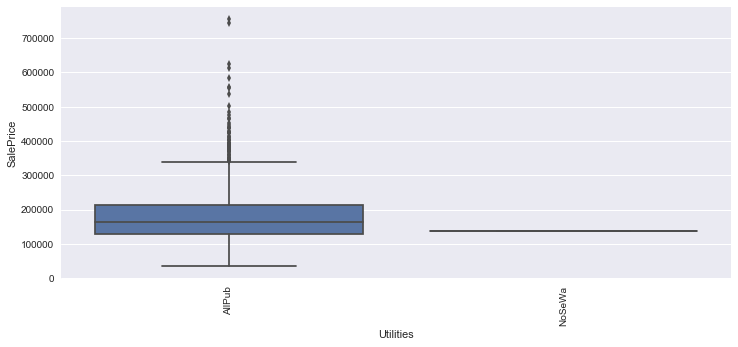

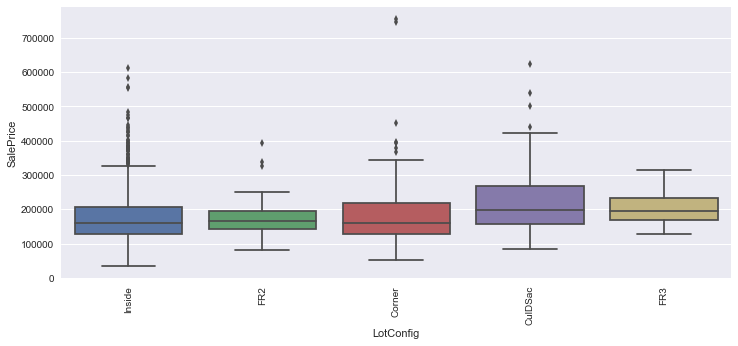

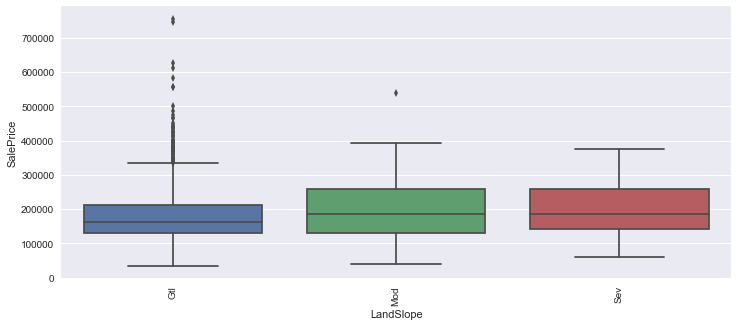

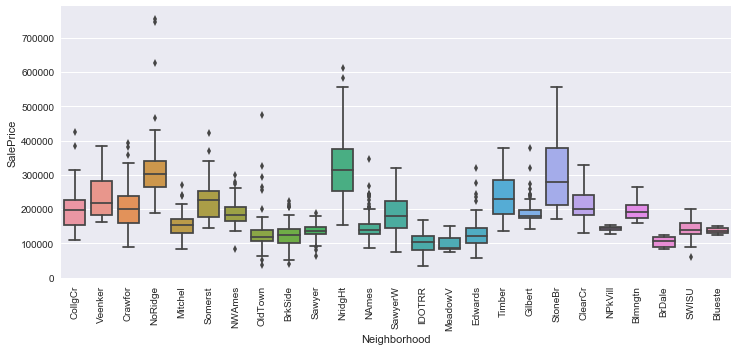

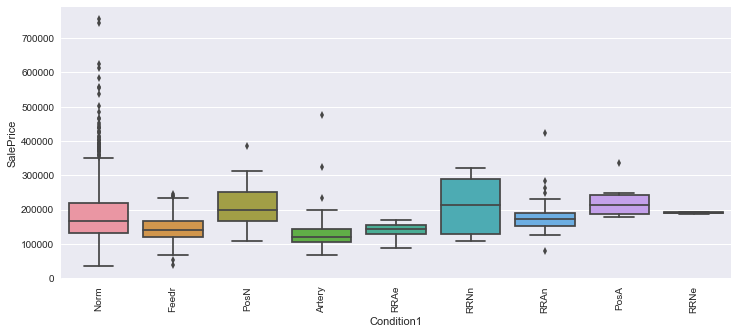

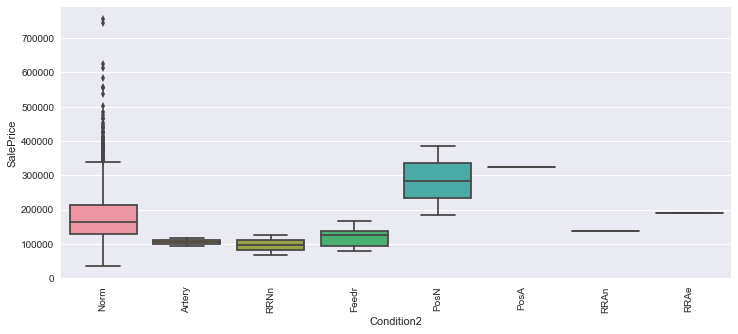

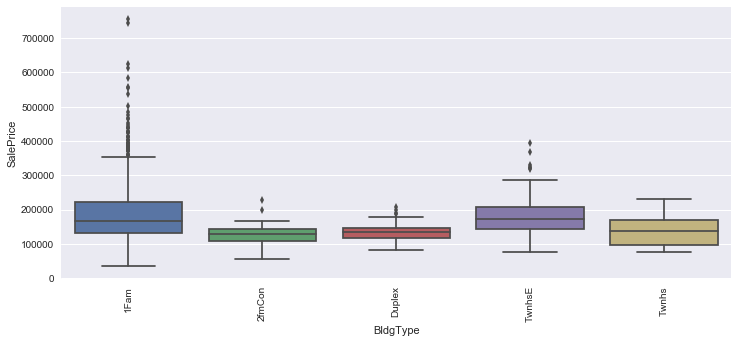

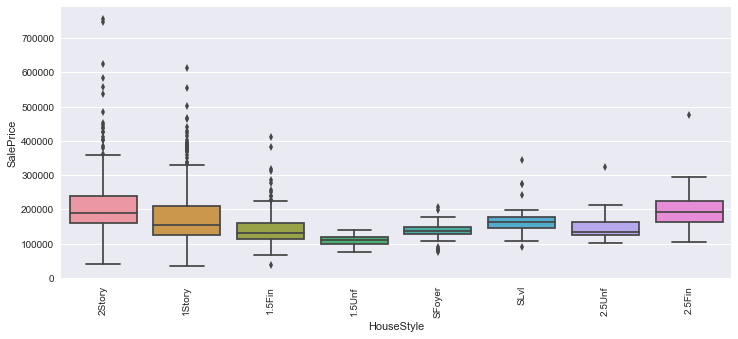

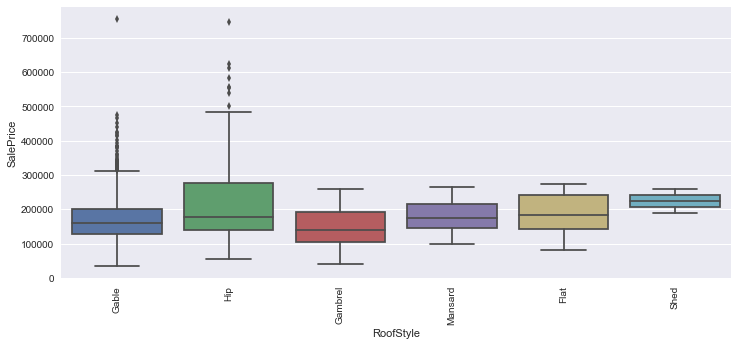

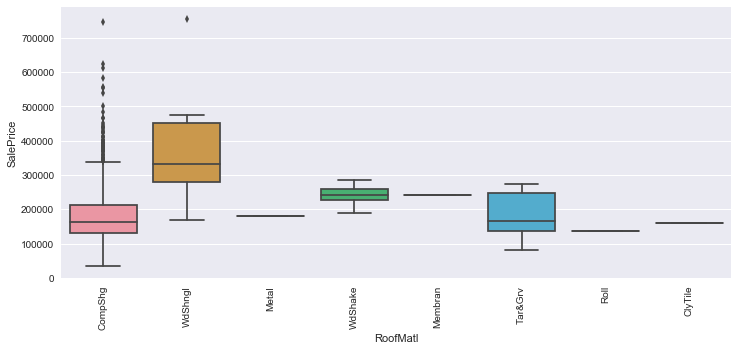

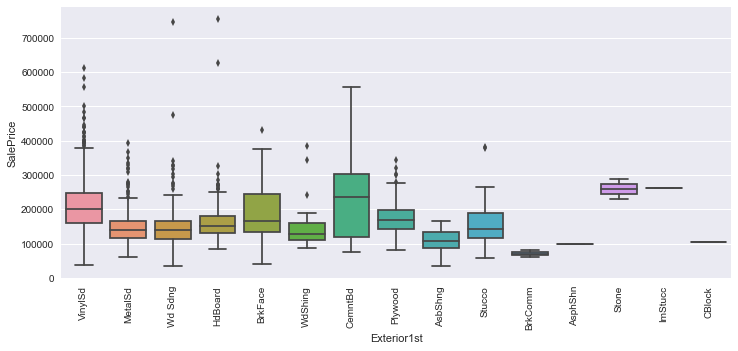

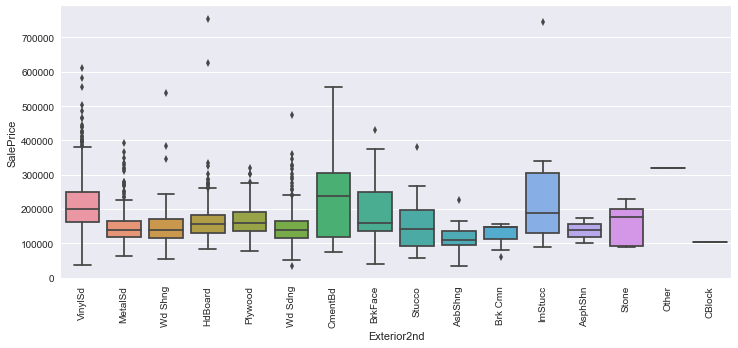

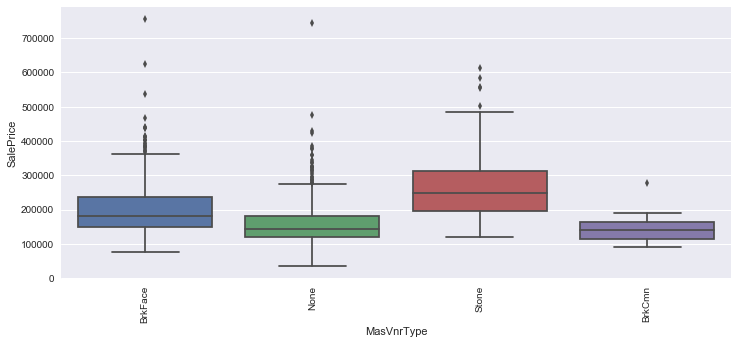

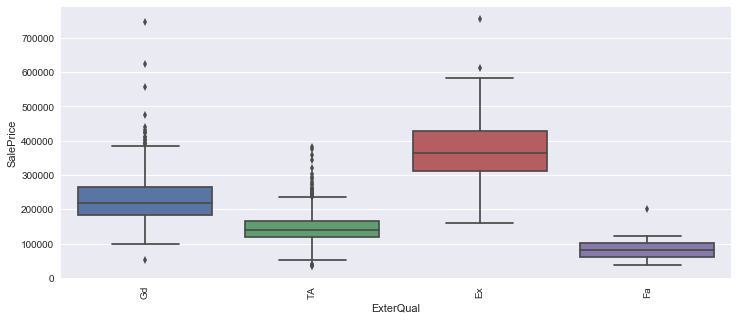

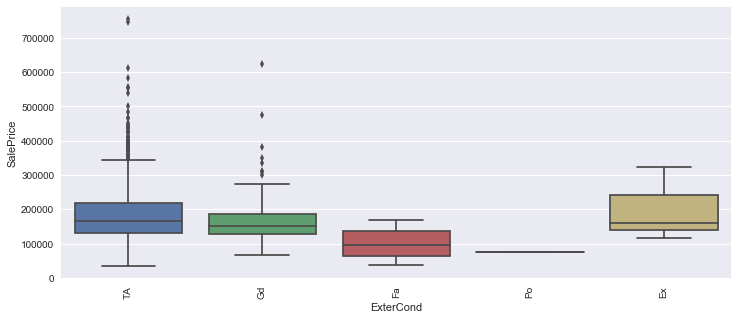

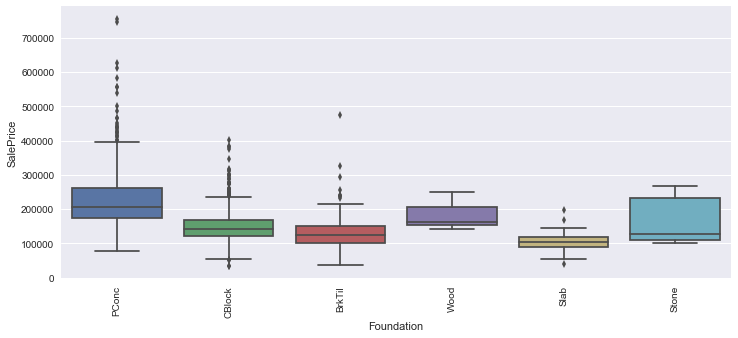

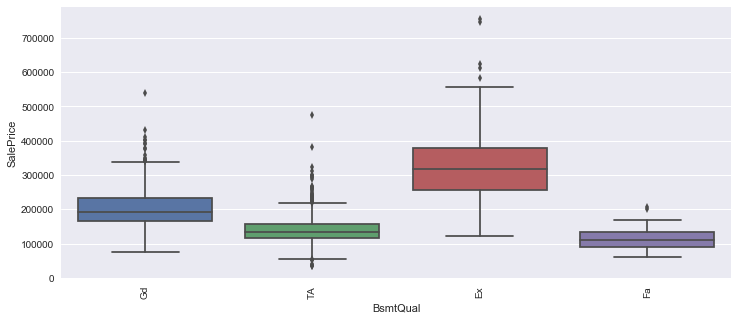

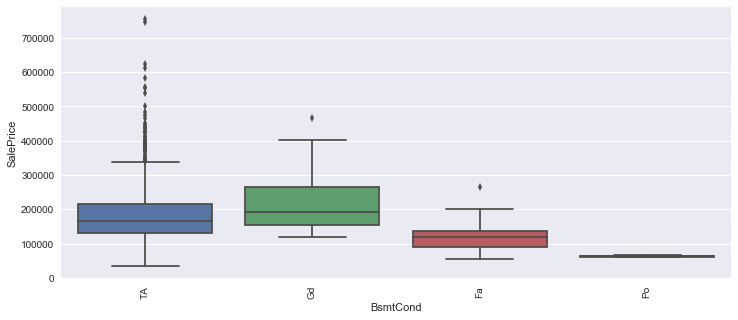

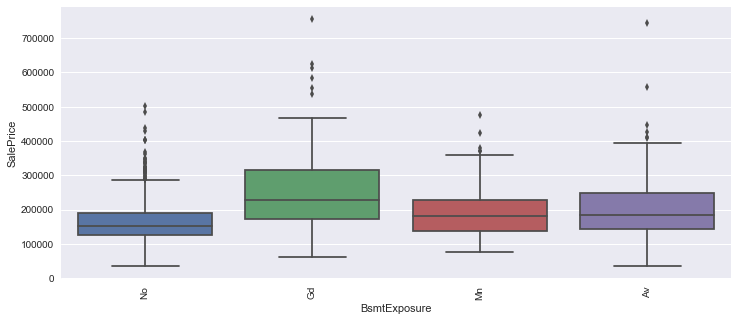

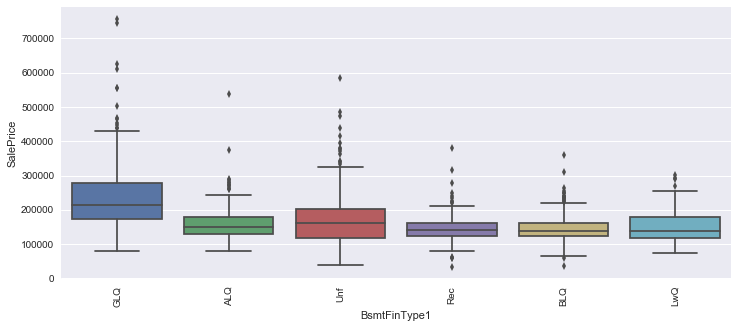

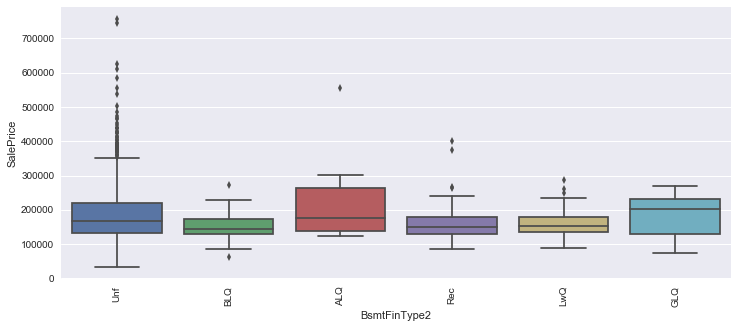

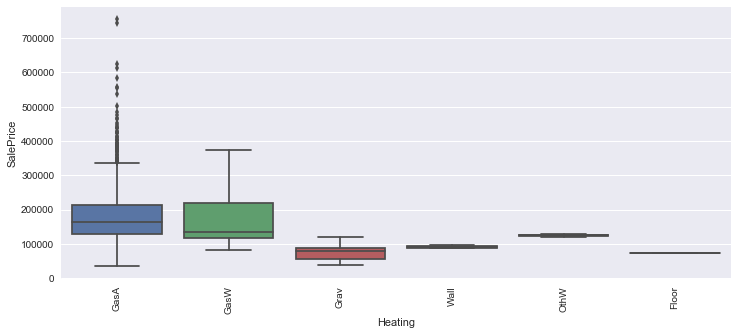

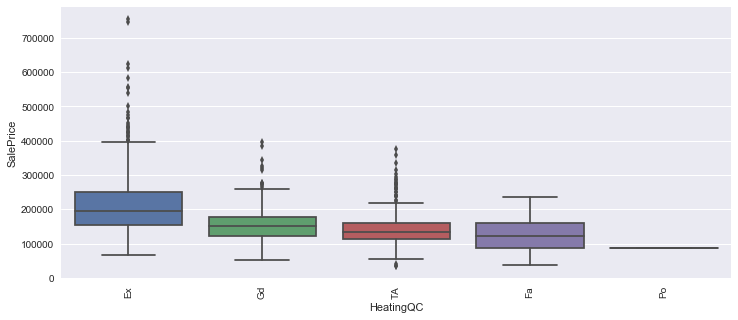

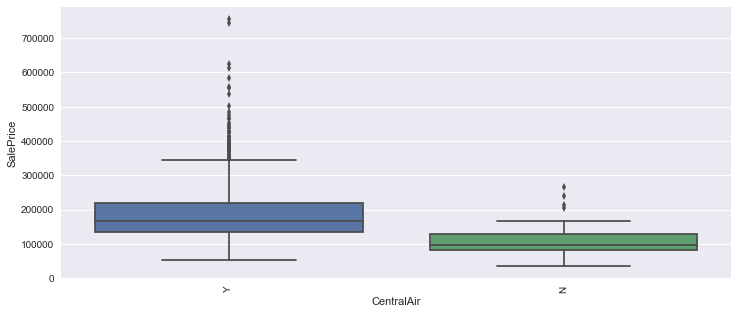

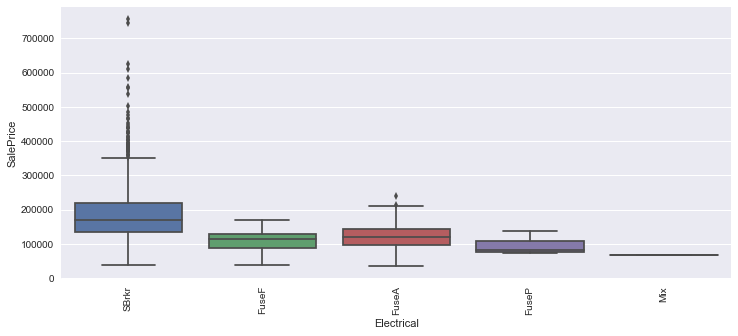

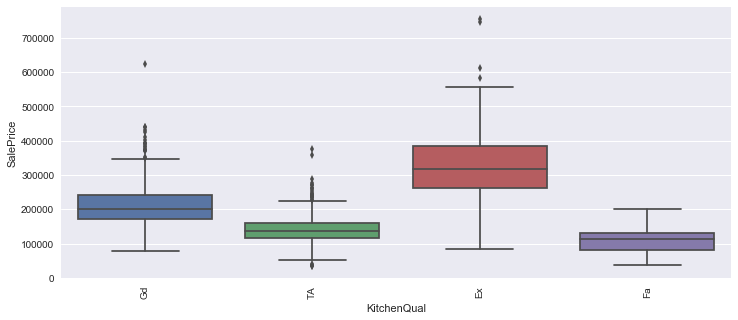

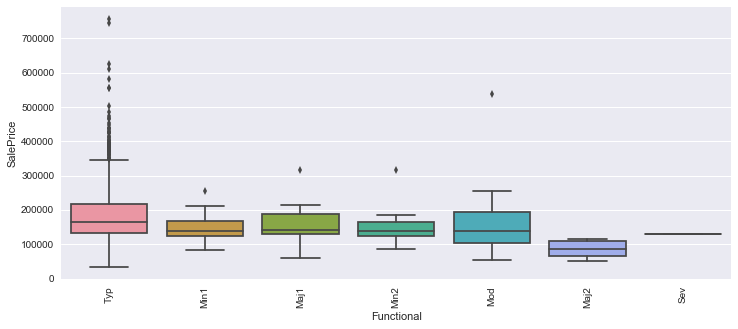

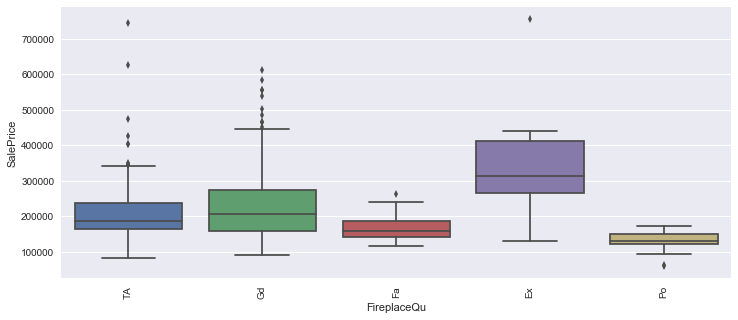

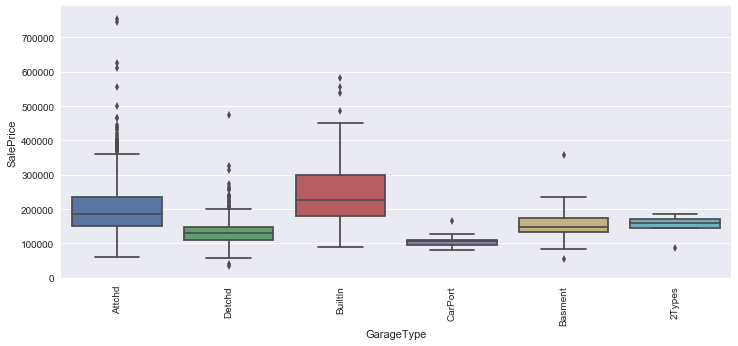

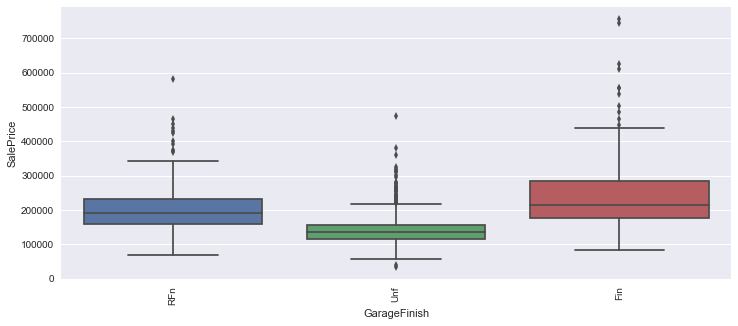

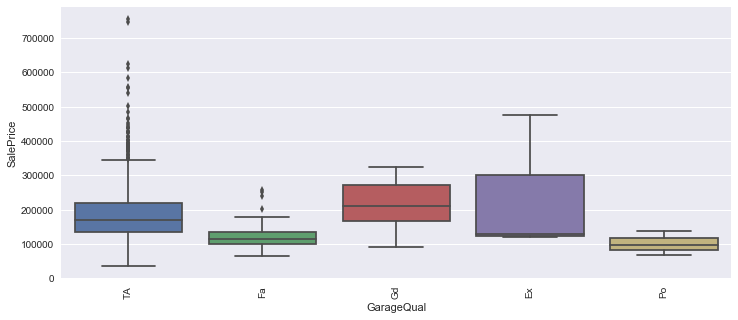

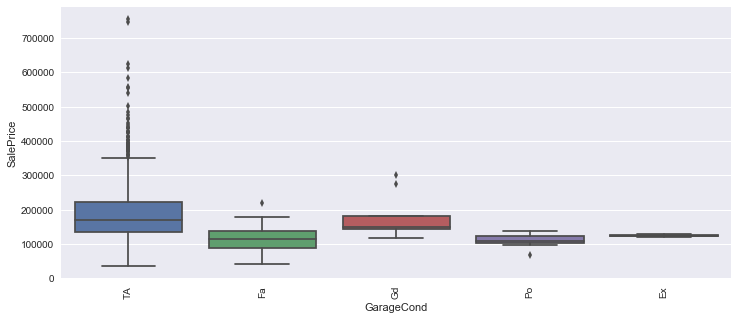

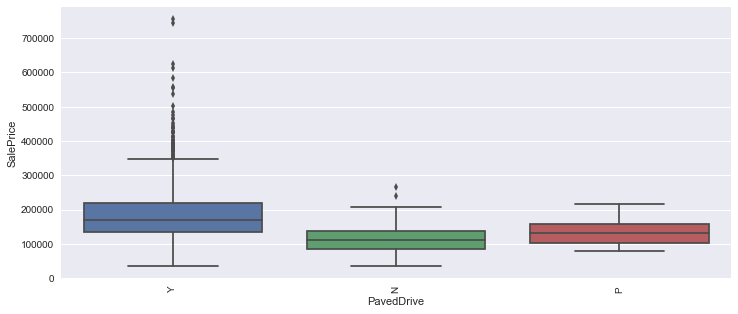

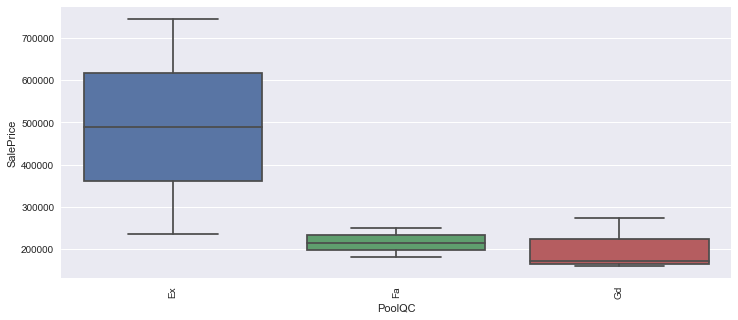

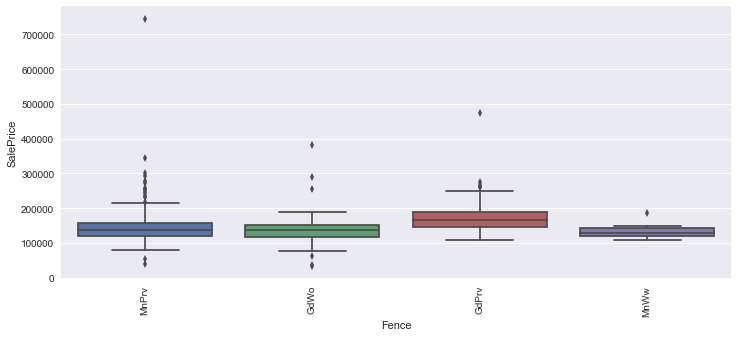

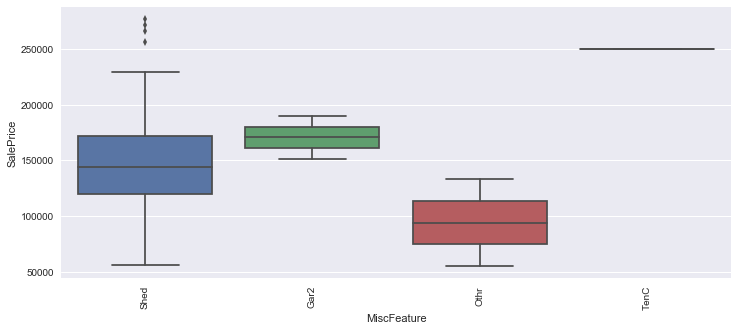

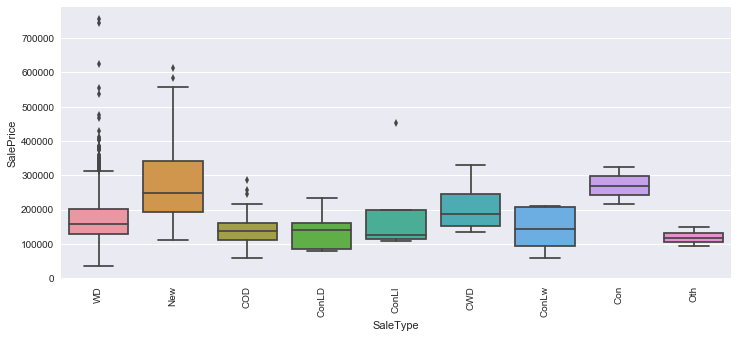

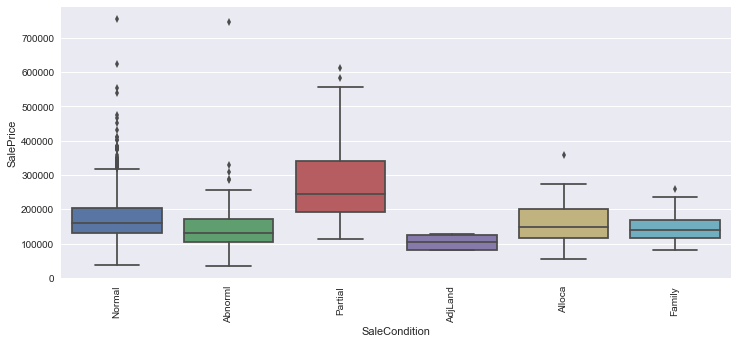

In [26]:
#Distribution of categorical data
for col in df_train.columns.tolist():
    if df_train[col].dtype == 'object':
        plt.figure(figsize = (12,5))
        plt.xticks(rotation = 90)
        sns.boxplot(df_train[col], df_train['SalePrice'])
        plt.show()

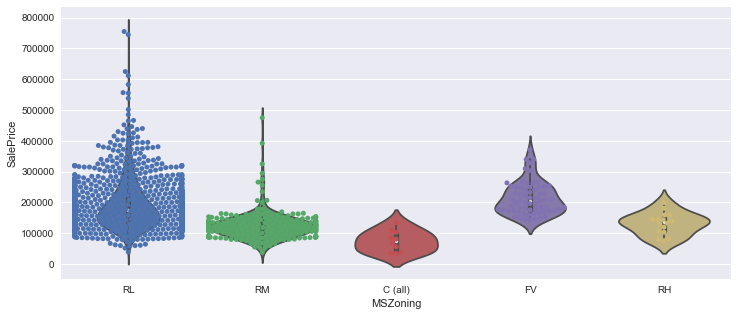

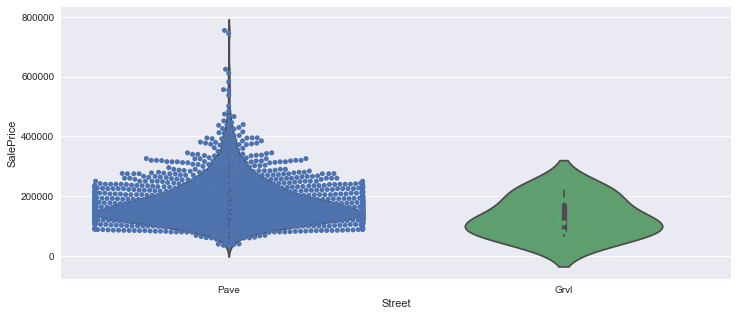

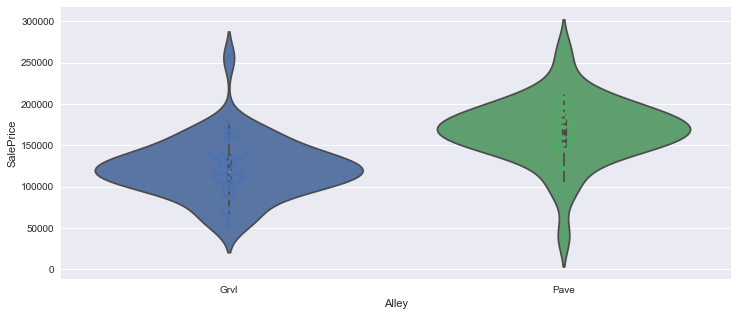

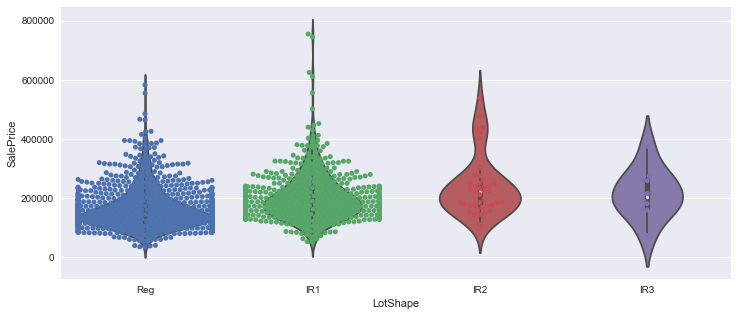

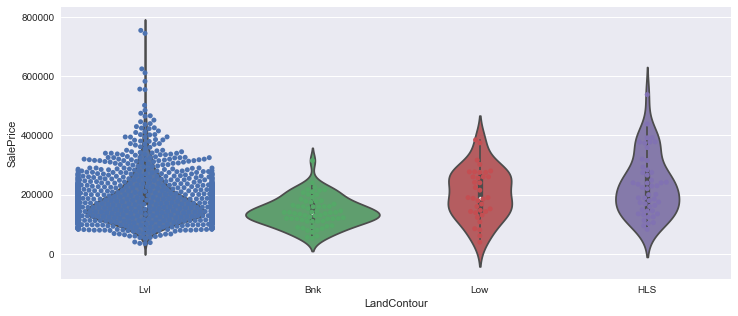

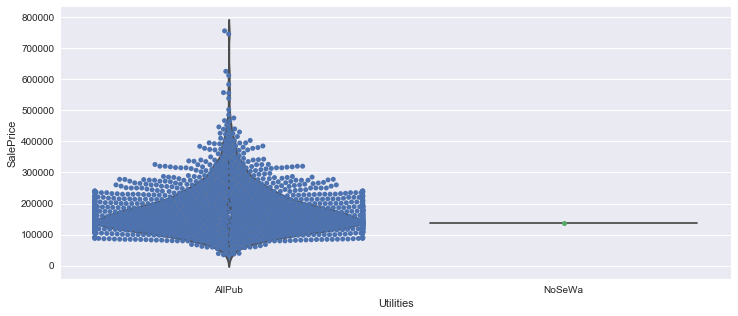

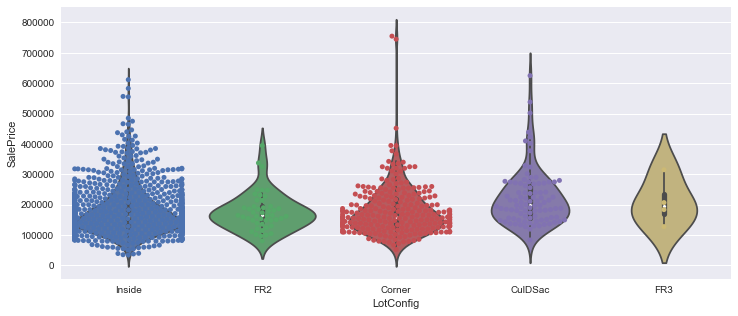

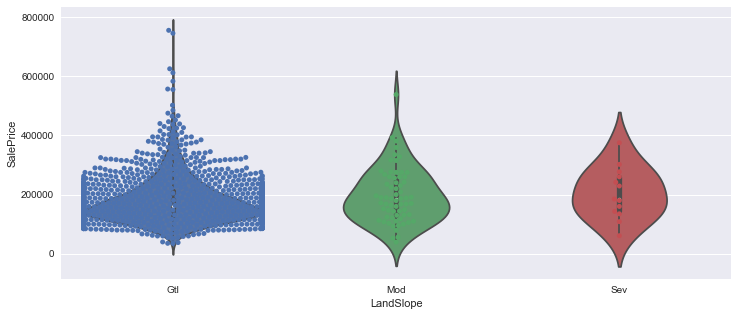

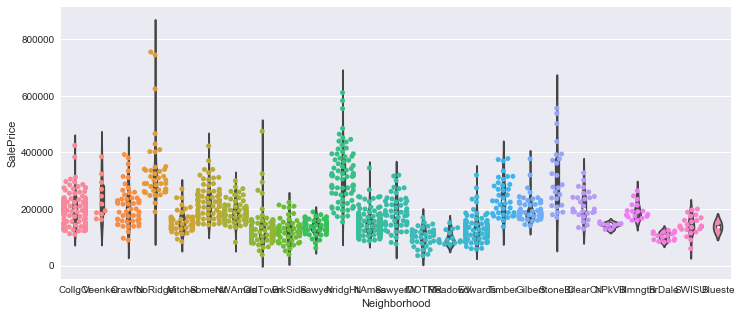

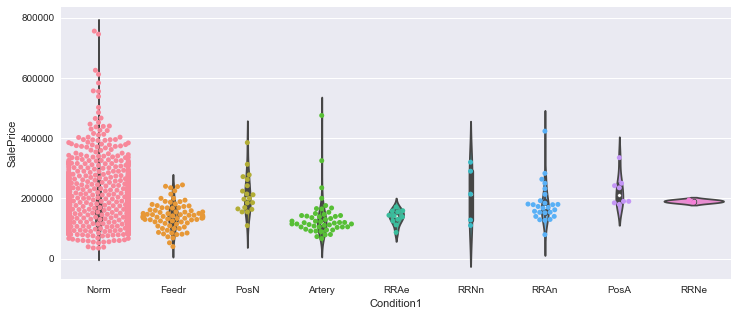

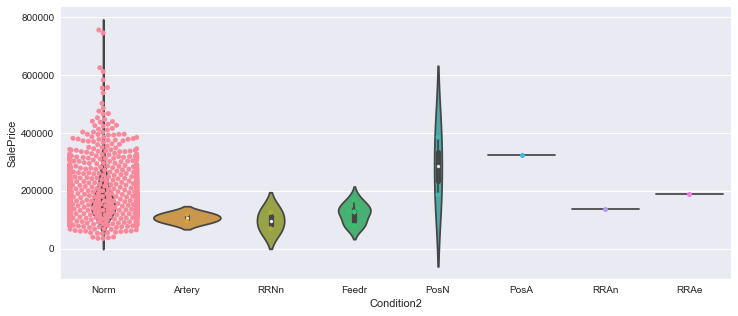

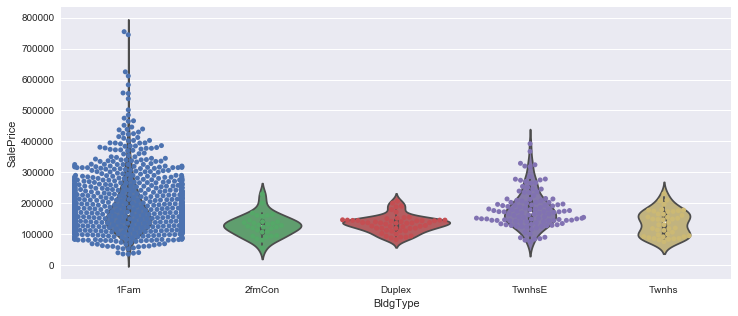

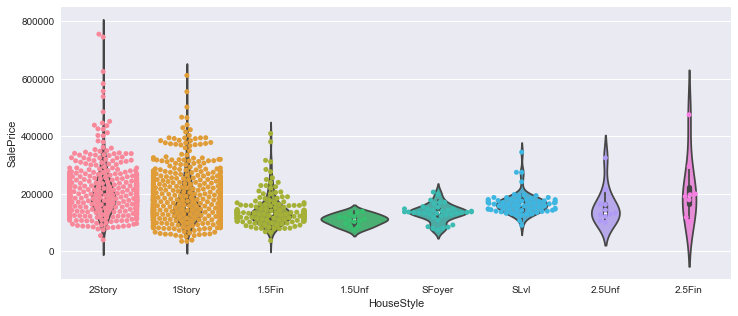

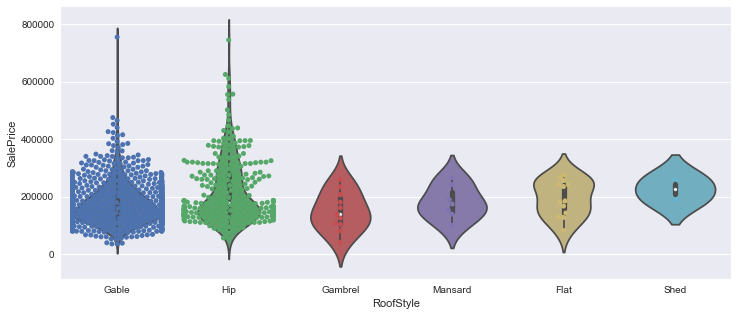

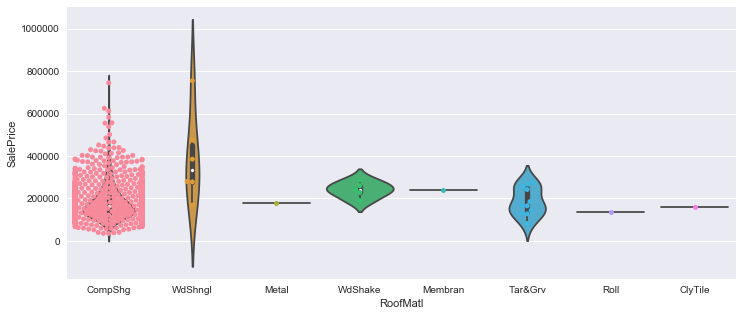

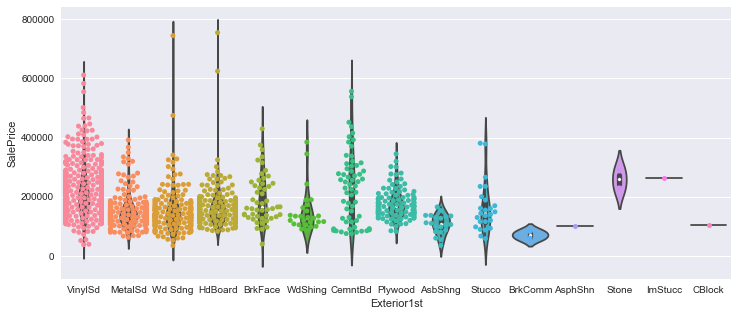

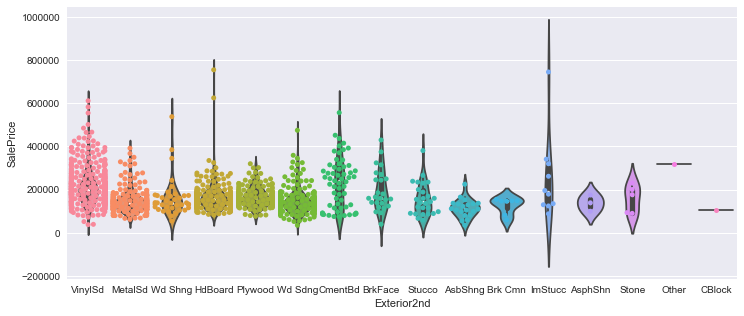

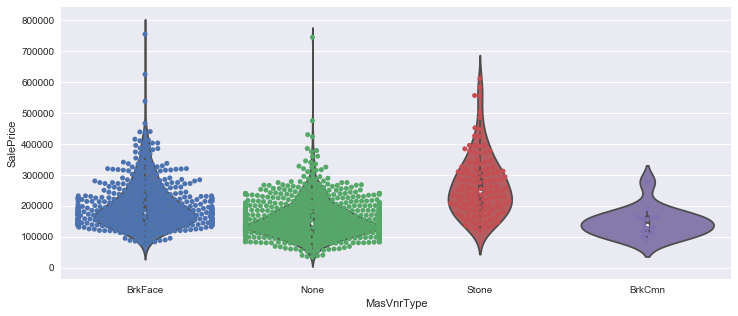

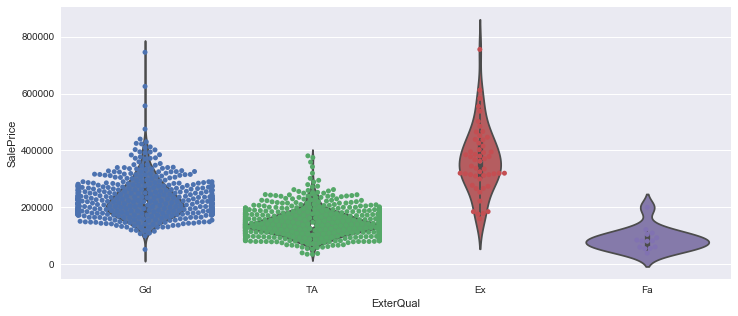

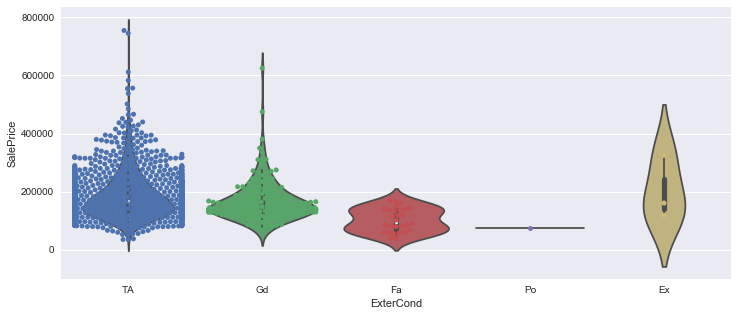

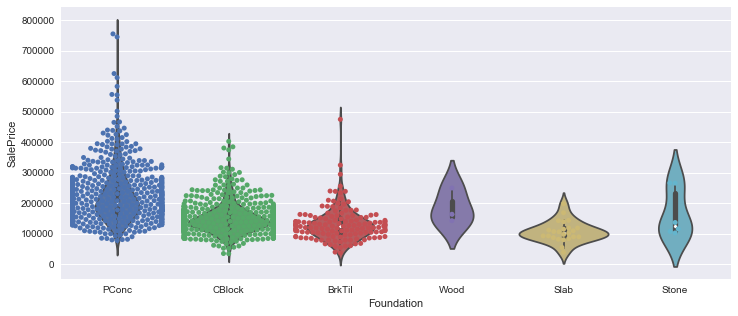

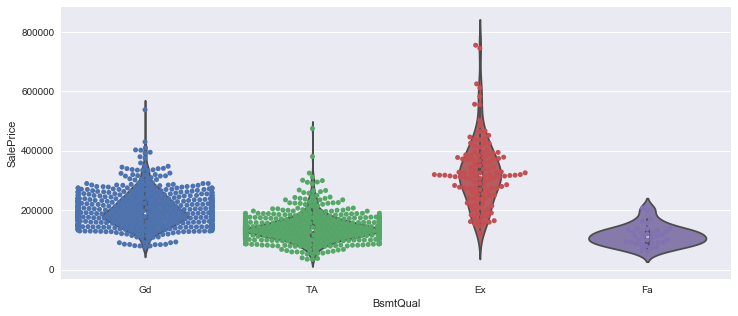

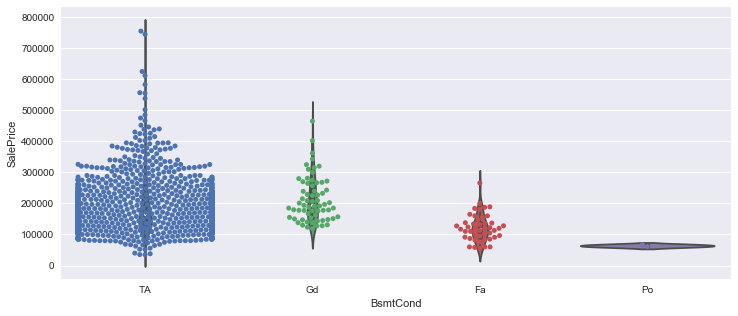

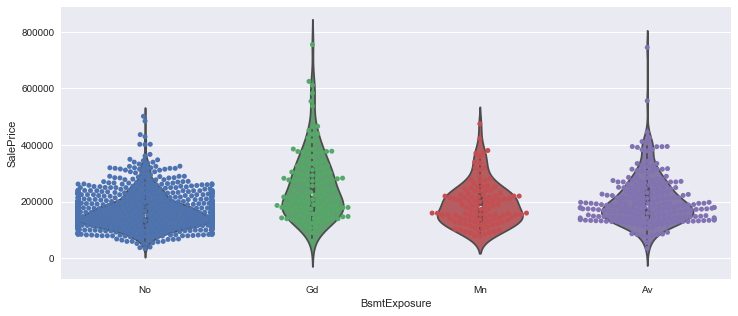

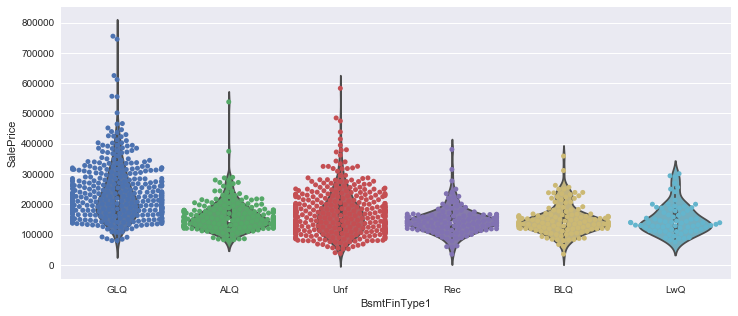

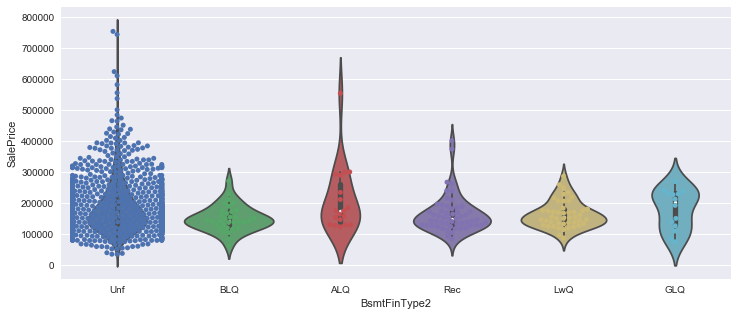

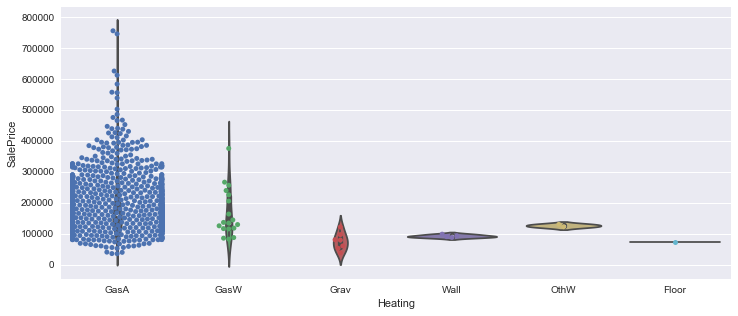

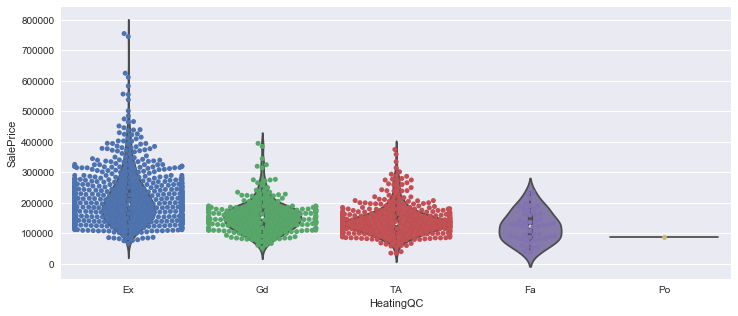

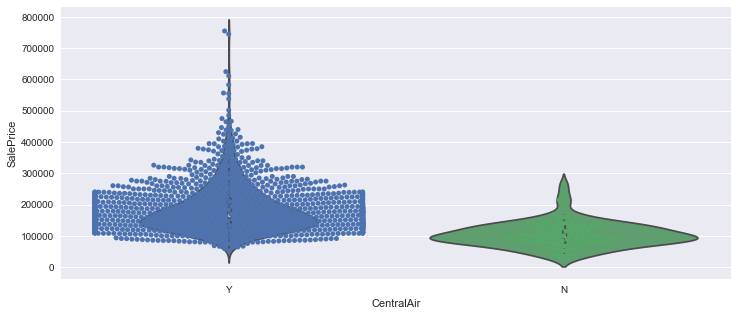

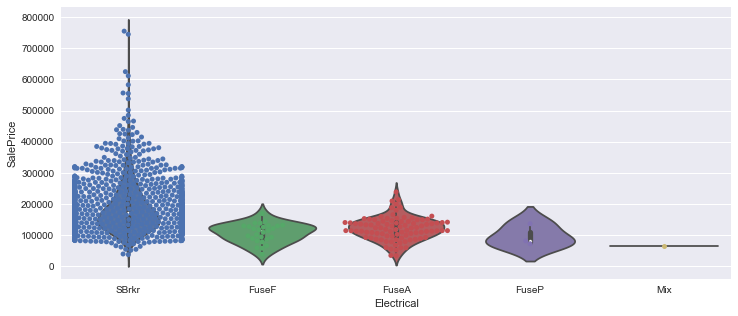

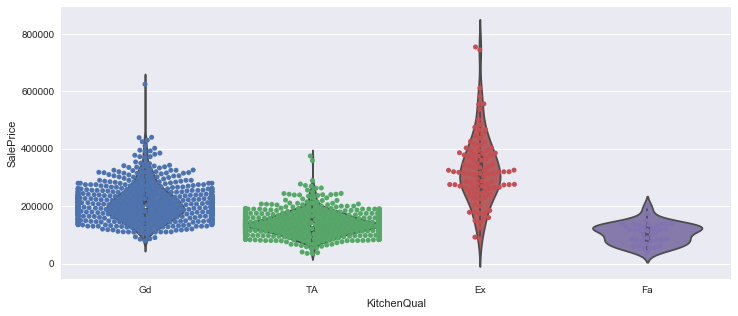

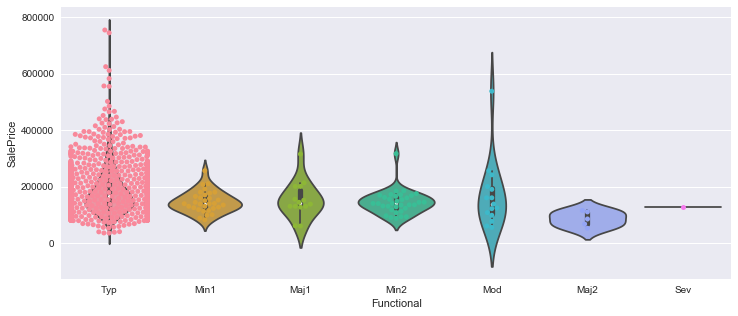

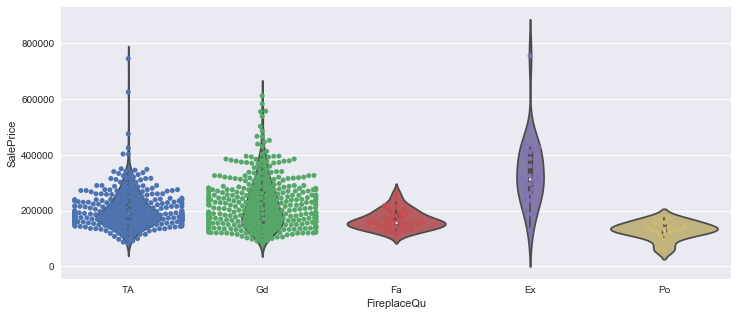

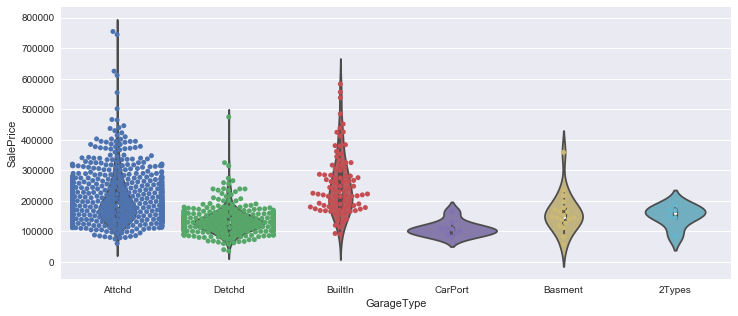

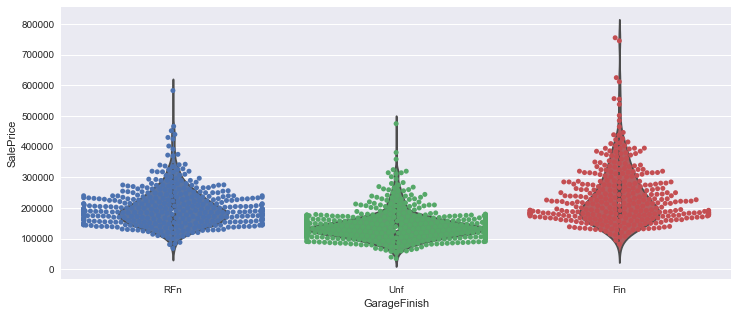

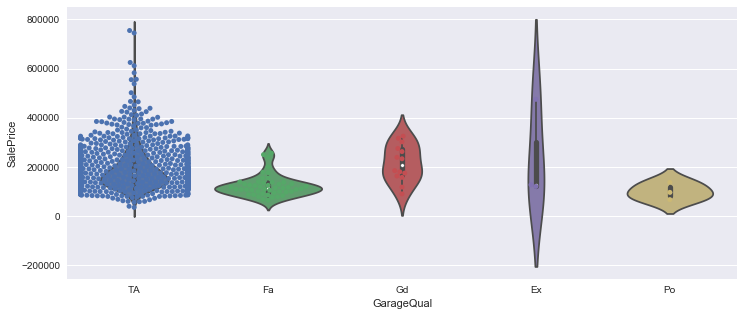

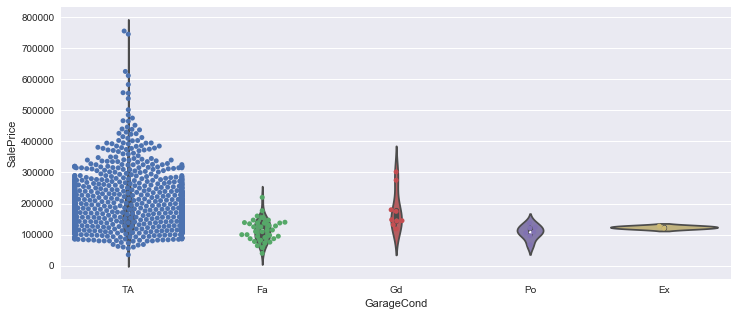

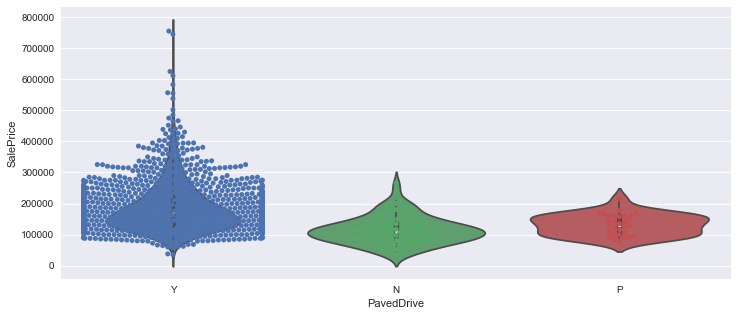

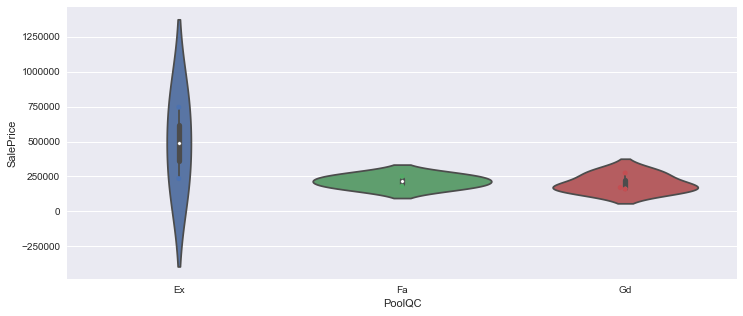

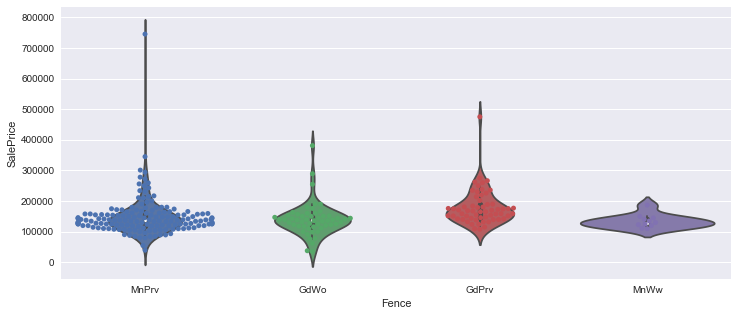

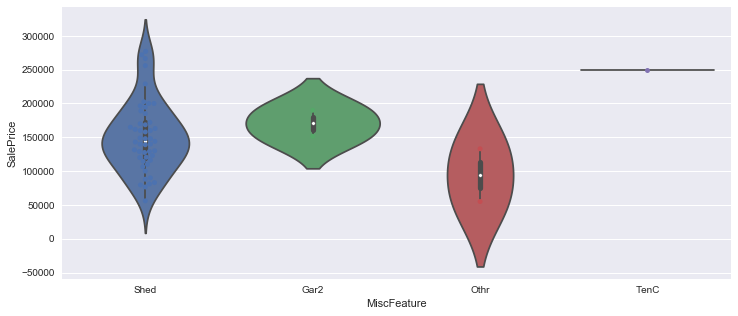

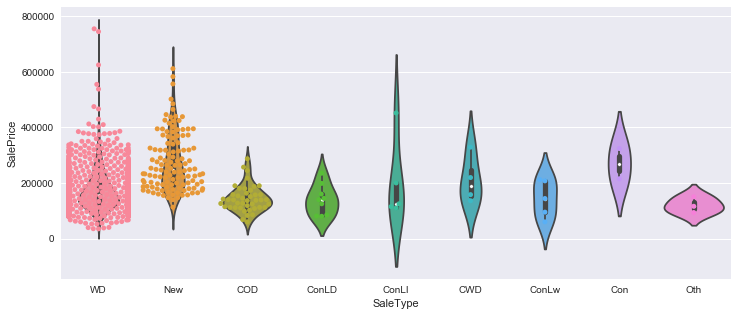

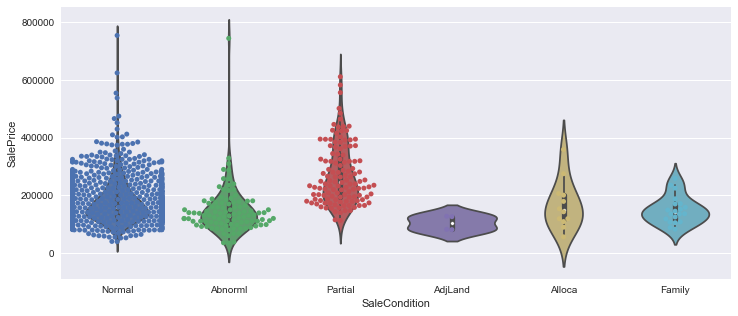

In [27]:

for col in df_train.columns.tolist():
    if df_train[col].dtype == 'object':
        plt.figure(figsize = (12,5))
        sns.violinplot(categorical_features[col], df_train['SalePrice'])
        sns.swarmplot(categorical_features[col], df_train['SalePrice'])
        plt.show()

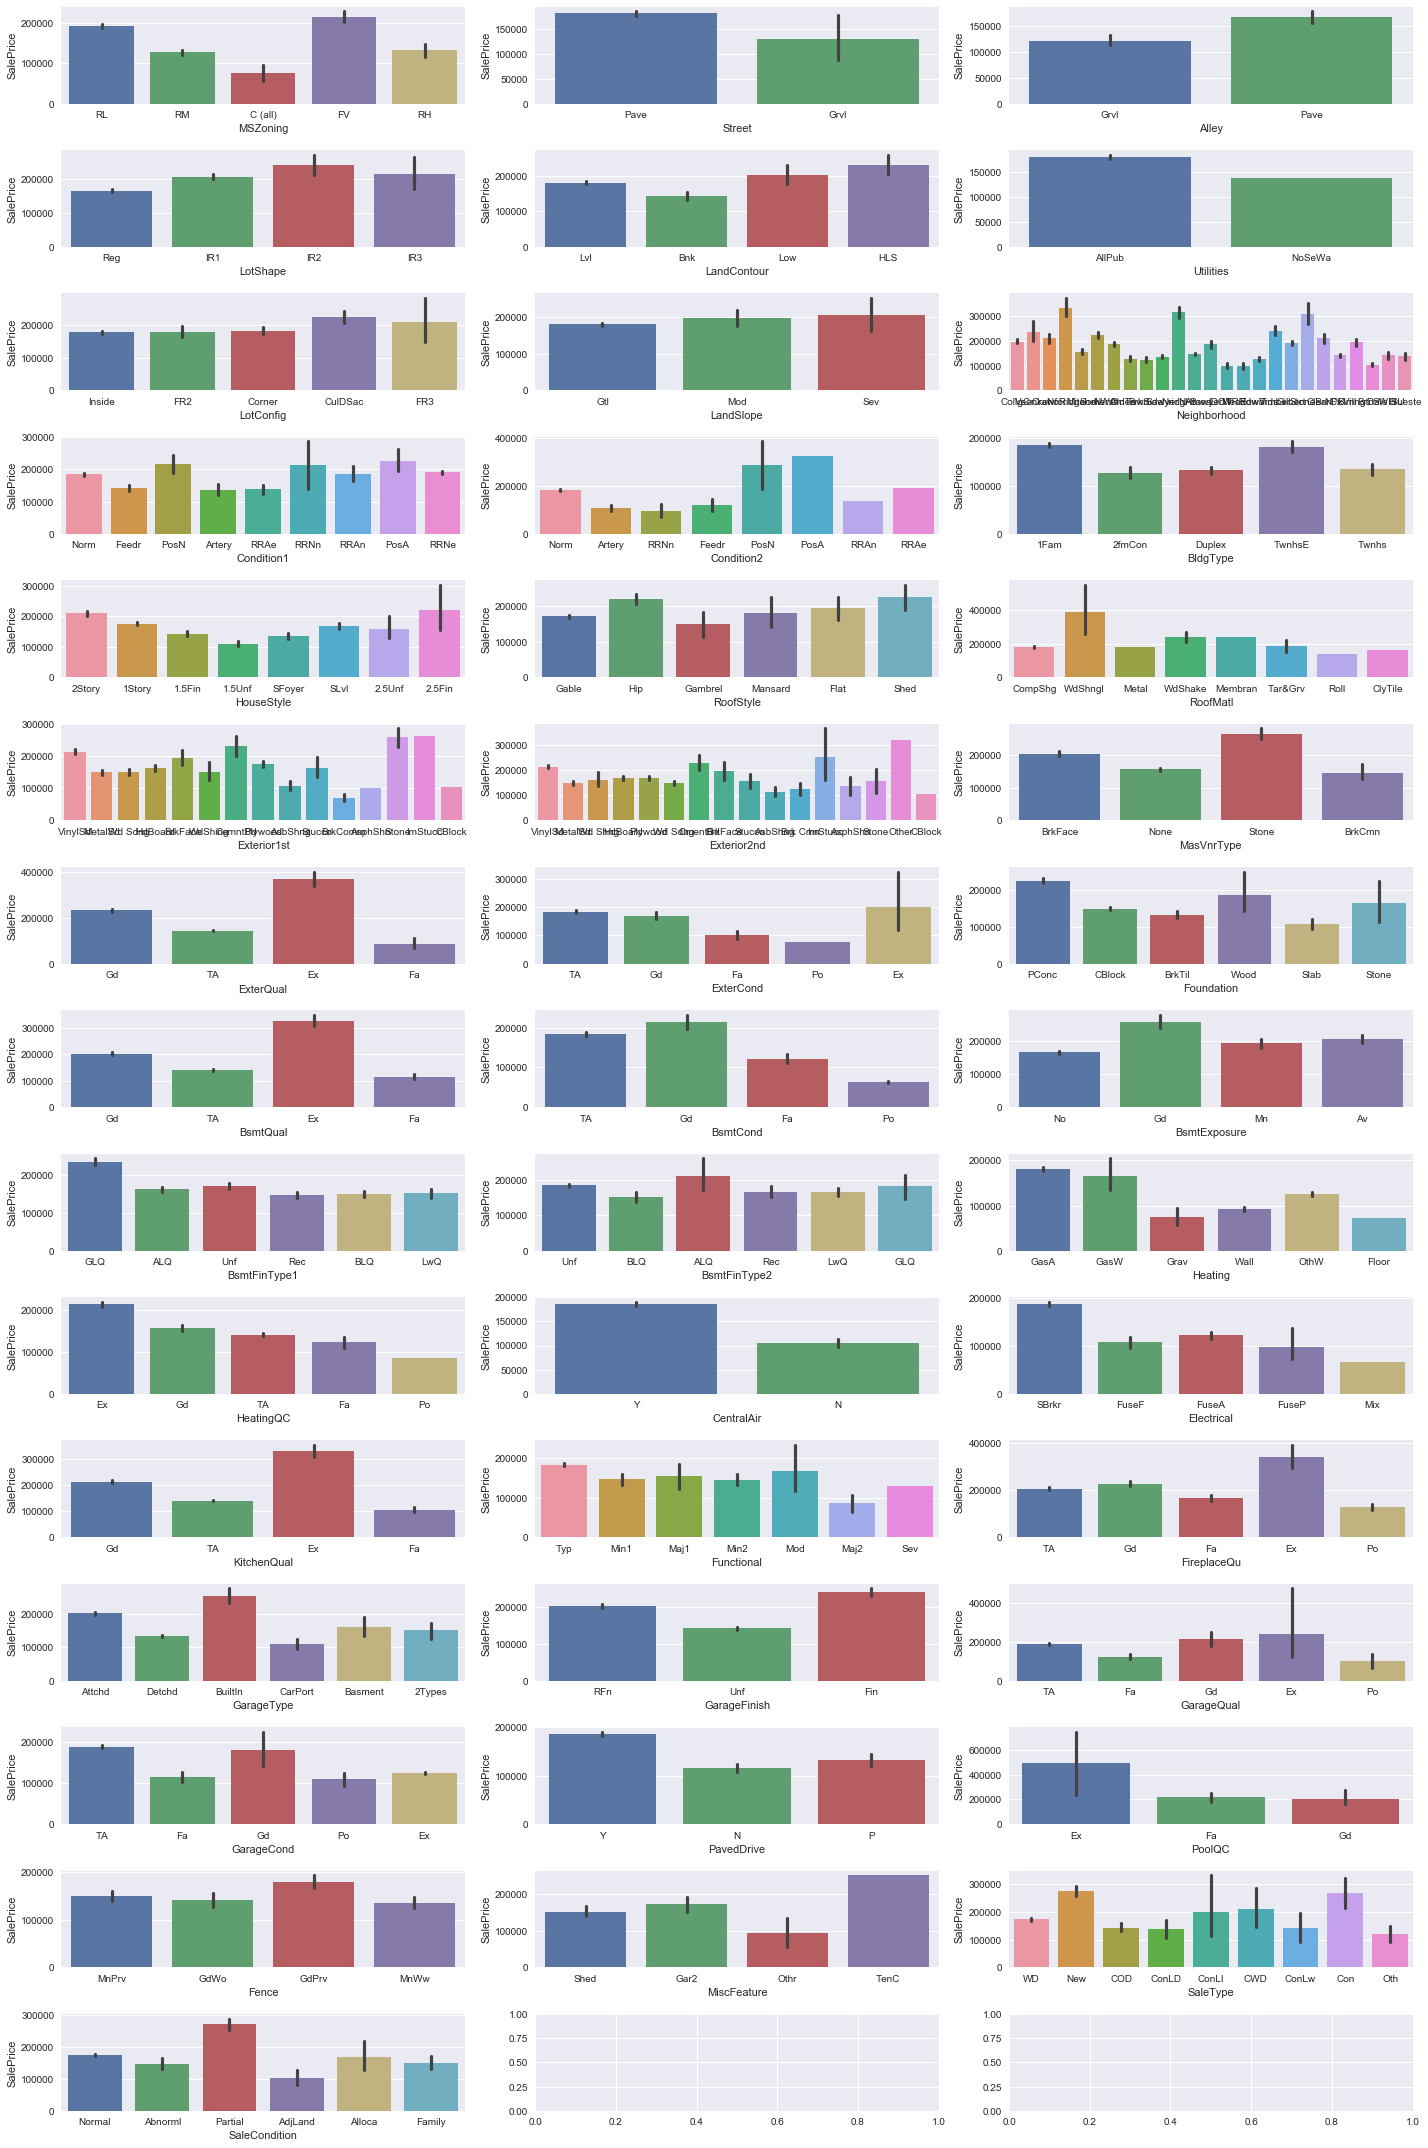

In [28]:
fig, axs = plt.subplots(15,3, figsize=(20, 30), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3, right=0.95)
axs = axs.ravel()
for ind, col in enumerate(categorical_features.columns):
        sns.barplot(categorical_features[col], df_train['SalePrice'], ax = axs[ind])
        plt.tight_layout()
plt.show()

In [29]:
#missing data in Training set
pd.set_option('precision', 6)
null_values_per_col =  df_train.isnull().sum().sort_values(ascending = False)
percent = ( df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
print(missing_data.head(20)) 

              Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000


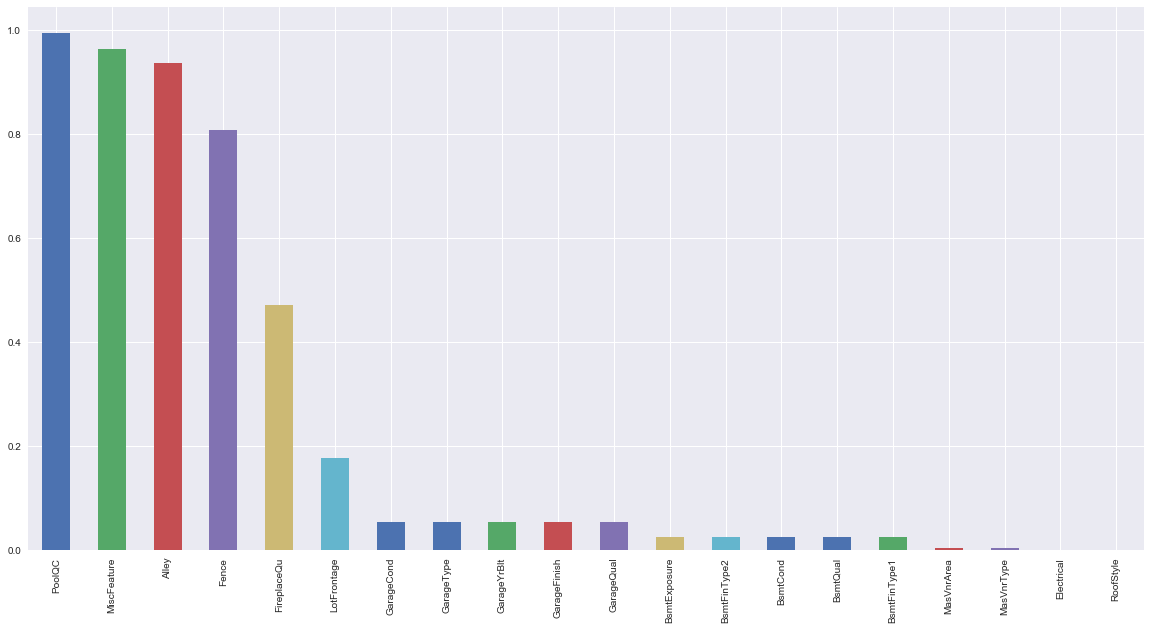

In [30]:
plt.figure(figsize = (20,10))
percent.sort_values(ascending = False).head(20).plot.bar()
plt.show()

In [31]:
#missing data in Test set
pd.set_option('precision', 6)
null_values_per_col =  df_test.isnull().sum().sort_values(ascending = False)
percent = ( df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([null_values_per_col, percent.astype(float)], axis = 1, keys =["Total", "Percent"])
missing_data.head(30)

Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.500343
LotFrontage     227  0.155586
GarageCond       78  0.053461
GarageQual       78  0.053461
GarageYrBlt      78  0.053461
GarageFinish     78  0.053461
GarageType       76  0.052090
BsmtCond         45  0.030843
BsmtQual         44  0.030158
BsmtExposure     44  0.030158
BsmtFinType1     42  0.028787
BsmtFinType2     42  0.028787
MasVnrType       16  0.010966
MasVnrArea       15  0.010281
MSZoning          4  0.002742
BsmtHalfBath      2  0.001371
Utilities         2  0.001371
Functional        2  0.001371
BsmtFullBath      2  0.001371
BsmtFinSF2        1  0.000685
BsmtFinSF1        1  0.000685
Exterior2nd       1  0.000685
BsmtUnfSF         1  0.000685
TotalBsmtSF       1  0.000685
SaleType          1  0.000685
Exterior1st       1  0.000685

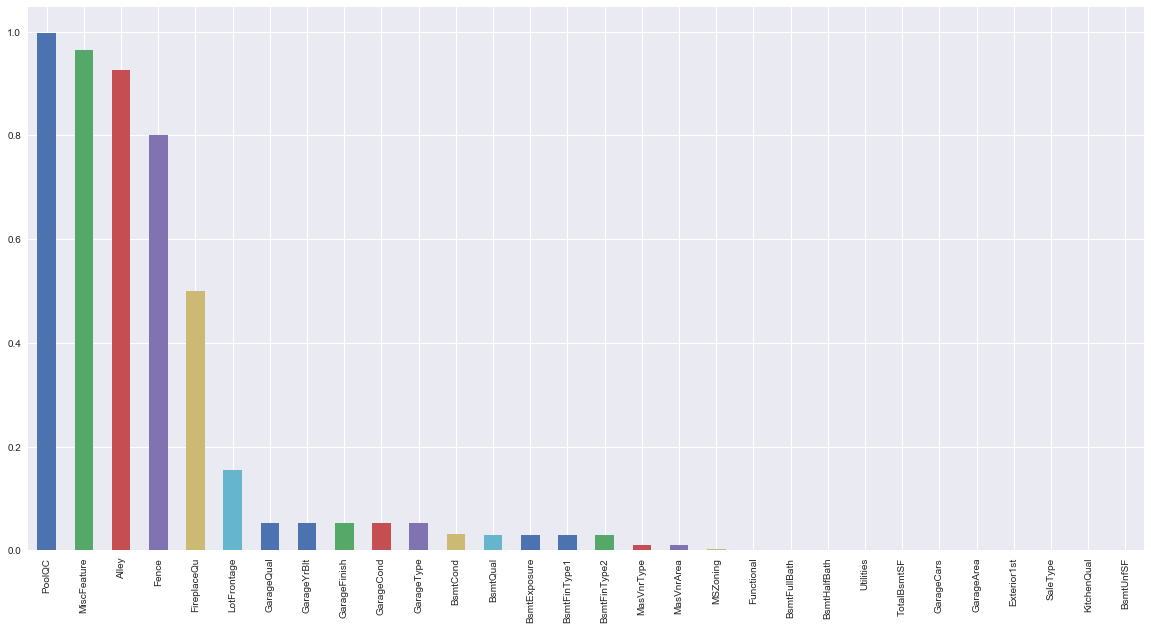

In [32]:
plt.figure(figsize = (20,10))
percent.sort_values(ascending = False).head(30).plot.bar()
plt.show()

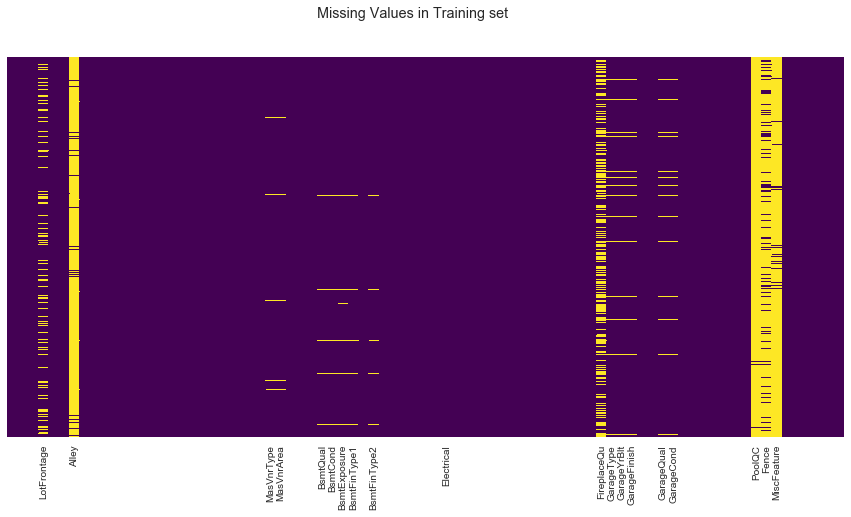

In [33]:
#heatmap of missing values in training set
label_nas = []
for col in df_train.columns.tolist():
    if np.sum(df_train[col].isnull()) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")
plt.figure(figsize = (15,7))
plt.suptitle("Missing Values in Training set")
sns.heatmap(df_train.isnull(), yticklabels = False, xticklabels = label_nas, cmap = 'viridis', cbar = False)
plt.show()

del label_nas

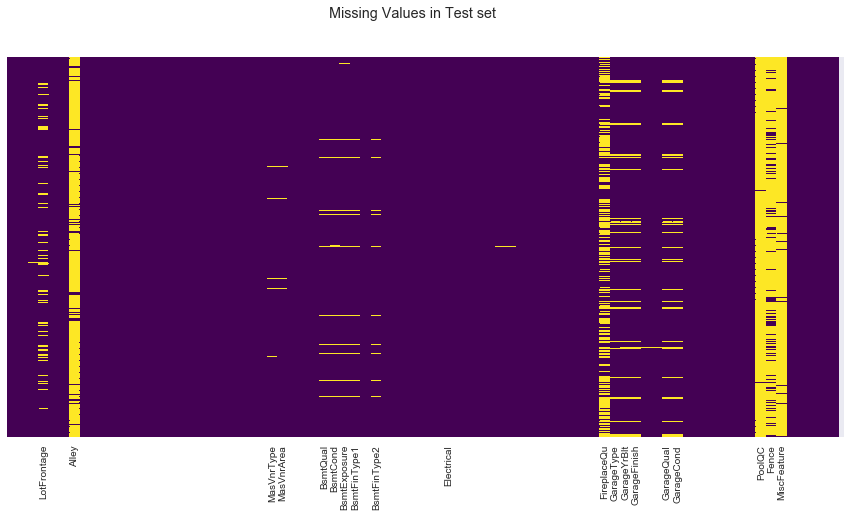

In [34]:
#heatmap of missing values in test set
label_nas = []
for col in df_train.columns.tolist():
    if np.sum(df_train[col].isnull()) != 0:
        label_nas.append(col)
    else:
        label_nas.append("")
plt.figure(figsize = (15,7))
plt.suptitle("Missing Values in Test set")
sns.heatmap(df_test.isnull(), yticklabels = False, xticklabels = label_nas, cmap = 'viridis', cbar = False)
plt.show()

del label_nas

# 4. Cleaning and Preparing the Data

In [35]:
#removing col having 2/3 of missing instances
max_na = int(2*df_train.shape[0]/3.0)
null_values_per_col = df_train.drop(["Id", "SalePrice"], axis = 1).isnull().sum()
cols_to_remove = []
for col in df_train.drop(["Id", "SalePrice"], axis = 1).columns.tolist():
    if(null_values_per_col[col] > max_na):
        cols_to_remove.append(col)
        df_train.drop(col, axis=1, inplace = True)
df_test.drop(cols_to_remove, axis = 1, inplace = True)
print("Train:" + str(df_train.shape))
print("Test :" + str(df_test.shape))
print("cols removed:")
print(cols_to_remove)

del cols_to_remove

Train:(1460, 77)
Test :(1459, 76)
cols removed:
['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [36]:
null_values_per_col = df_train.drop(["Id", "SalePrice"], axis = 1).isnull().sum()
cols_to_impute =[]
print("Cols to impute:")
for col in df_train.drop(["Id", "SalePrice"], axis = 1).columns.tolist():
    if null_values_per_col[col] != 0:
        cols_to_impute.append(col)
        print(col)

Cols to impute:
LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


In [37]:
imputation_val_for_na_cols = dict()
for col in cols_to_impute:
    if(df_train[col].dtype != 'object'):
        imputation_val_for_na_cols[col] = np.nanmedian(df_train[col])
    else:
        imputation_val_for_na_cols[col] = df_train[col].value_counts().argmax()

        
for key, val in imputation_val_for_na_cols.items():
    df_train[key].fillna(value = val, inplace = True)
    df_test[key].fillna(value = val, inplace = True)
print("No of missing value in training set :" ,np.sum(np.sum(df_train.isnull())))
print("No of missing value in testing set :" ,np.sum(np.sum(df_test.isnull())))



No of missing value in training set : 0
No of missing value in testing set : 22


In [38]:
null_values_per_col_test = df_test.drop(["Id"], axis =1).isnull().sum()
cols_to_impute = []
print("cols to impute:")
imputation_val_for_na_cols = dict()
for col in df_test.drop(["Id"], axis =1).columns.tolist():
    if null_values_per_col_test[col] != 0:
        cols_to_impute.append(col)
        print(col)
        if df_test[col].dtype != 'object':
            imputation_val_for_na_cols[col] = np.nanmedian(df_test[col])
        else:
            imputation_val_for_na_cols[col] = df_train[col].value_counts().argmax()
            


cols to impute:
MSZoning
Utilities
Exterior1st
Exterior2nd
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageCars
GarageArea
SaleType


In [39]:
for key, val in imputation_val_for_na_cols.items():
    df_test[key].fillna(value = val, inplace = True)
print("No of missing values in Test set", np.sum(np.sum(df_test.isnull())))

No of missing values in Test set 0


# 5. Preparing the Data for Modeling - Data Munging

In [40]:
X, y = df_train.drop(["Id", "SalePrice"], axis = 1), df_train["SalePrice"]
X_test = df_test.drop(["Id"], axis = 1)

In [41]:
print("X  :", X.shape)
print("X_test :", X_test.shape)
print("y  :", y.shape)


X  : (1460, 75)
X_test : (1459, 75)
y  : (1460,)


In [42]:
categorical_features = X.select_dtypes(include = [np.object])
numeric_features = X.select_dtypes(include = [np.number])

In [43]:
categorical_features.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      KitchenQual Functional  \
0      CollgCr       Norm       Norm      ...               Gd        Typ   
1      Veenker      Feedr       Norm      ...               TA        Typ   
2      CollgCr       Norm       Norm      ...               Gd        Typ   
3      Crawfor       Norm       Norm      ...               Gd        Typ   
4      NoRidge       Norm       Norm      ...               Gd        Typ   

  FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0          Gd     Attchd          RFn         TA         TA          Y   
1          TA     Attchd          RFn         TA         TA          Y   
2          TA     Attchd          RFn         TA         TA          Y   
3          Gd     Detchd          Unf         TA         TA          Y   
4          TA     Attchd          RFn         TA         TA          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 39 columns]

In [50]:
for feature in categorical_features:
    # Label categorical values
    lbl_enc = LabelEncoder()
    X[feature] = lbl_enc.fit_transform(X[feature])
    X_test[feature] = lbl_enc.transform(X_test[feature])
    
    # Perform one hot encoding
    ohe = OneHotEncoder(sparse = False)
    
    # Name columns
    columns = [feature + '_' + str(class_) for class_ in lbl_enc.classes_]
    
    # Create Dummies 
    # Drop first column to avoid dummy variable trap
    X_dummies = pd.DataFrame(ohe.fit_transform(X[feature].values.reshape(-1,1))[:,1:], columns = columns[1:])
    X_test_dummies = pd.DataFrame(ohe.transform(X_test[feature].values.reshape(-1,1))[:,1:], columns = columns[1:])
    
    # Drop original feature
    X.drop(feature, axis =1)
    X_test.drop(feature, axis=1)
    
    # Adding Dummies to dataset
    X = pd.concat([X, X_dummies], axis=1)
    X_test = pd.concat([X_test, X_test_dummies], axis=1)
    

In [45]:
X.shape

(1460, 275)

In [46]:
X_test.shape

(1459, 275)

In [47]:
# A peek at data
X.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3         65.0     8450       1         3            3   
1          20         3         80.0     9600       1         3            3   
2          60         3         68.0    11250       1         0            3   
3          70         3         60.0     9550       1         0            3   
4          60         3         84.0    14260       1         0            3   

   Utilities  LotConfig  LandSlope          ...            SaleType_ConLI  \
0          0          4          0          ...                       0.0   
1          0          2          0          ...                       0.0   
2          0          4          0          ...                       0.0   
3          0          0          0          ...                       0.0   
4          0          2          0          ...                       0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 275 columns]

In [48]:
# Splitting Dataset 
seed = 5
val_split = .25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_split, random_state = seed)

In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1095, 275)
(1095,)
(365, 275)
(365,)


# Modelling

In [147]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)

# Performance
model = lin_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 39885.71691691761
rmse on test 39543.67588653254


In [148]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

# Performance
model = deci_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 45451.933540706545
rmse on test 45634.66448456375


In [149]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

# Performance
model = rf_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 34056.05613516917
rmse on test 29943.215831309673


In [150]:
# Support Vector Regressor
from sklearn.svm import SVR
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_val)

# Performance
model = svm_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 80789.17967601464
rmse on test 76251.0225930569


# Applying log transformation on skewed numeric features

In [151]:
#earlier we calculated skews
skewed = skews[skews>0.5]
skewed.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'SalePrice'],
      dtype='object')

In [152]:
for indx in skewed.index:
    df_train[indx] = np.log1p(df_train[indx])

In [153]:
X, y = df_train.drop(["Id", "SalePrice"], axis = 1), df_train["SalePrice"]
X_test = df_test.drop(["Id"], axis = 1)

In [154]:
for feature in categorical_features:
    # Label categorical values
    lbl_enc = LabelEncoder()
    X[feature] = lbl_enc.fit_transform(X[feature])
    X_test[feature] = lbl_enc.transform(X_test[feature])
    
    # Perform one hot encoding
    ohe = OneHotEncoder(sparse = False)
    
    # Name columns
    columns = [feature + '_' + str(class_) for class_ in lbl_enc.classes_]
    
    # Create Dummies 
    # Drop first column to avoid dummy variable trap
    X_dummies = pd.DataFrame(ohe.fit_transform(X[feature].values.reshape(-1,1))[:,1:], columns = columns[1:])
    X_test_dummies = pd.DataFrame(ohe.transform(X_test[feature].values.reshape(-1,1))[:,1:], columns = columns[1:])
    
    # Drop original feature
    X.drop(feature, axis =1)
    X_test.drop(feature, axis=1)
    
    # Adding Dummies to dataset
    X = pd.concat([X, X_dummies], axis=1)
    X_test = pd.concat([X_test, X_test_dummies], axis=1)
    

In [155]:
X.shape, X_test.shape

((1460, 275), (1459, 275))

In [156]:
# A peek at data
X.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0    4.110874         3     4.189655  9.042040       1         3            3   
1    3.044522         3     4.394449  9.169623       1         3            3   
2    4.110874         3     4.234107  9.328212       1         0            3   
3    4.262680         3     4.110874  9.164401       1         0            3   
4    4.110874         3     4.442651  9.565284       1         0            3   

   Utilities  LotConfig  LandSlope          ...            SaleType_ConLI  \
0          0          4          0          ...                       0.0   
1          0          2          0          ...                       0.0   
2          0          4          0          ...                       0.0   
3          0          0          0          ...                       0.0   
4          0          2          0          ...                       0.0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0             0.0           0.0           0.0          1.0   
1             0.0           0.0           0.0          1.0   
2             0.0           0.0           0.0          1.0   
3             0.0           0.0           0.0          1.0   
4             0.0           0.0           0.0          1.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 275 columns]

In [157]:
# Splitting Dataset 
seed = 5
val_split = .25
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = val_split, random_state = seed)

In [158]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1095, 275)
(1095,)
(365, 275)
(365,)


# Modelling on transformed features

In [159]:
# Linear Regressor
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_val)

# Performance
model = lin_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 10087729.025556633
rmse on test 0.18635187268225703


In [160]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
deci_reg = DecisionTreeRegressor()
deci_reg.fit(X_train, y_train)
y_pred = deci_reg.predict(X_val)

# Performance
model = deci_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 0.2229815923202197
rmse on test 0.21506379876745124


In [161]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_val)

# Performance
model = rf_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 0.16045520117248024
rmse on test 0.14821560655397575


In [162]:
# Support Vector Regressor
from sklearn.svm import SVR
svm_reg = SVR(kernel = 'rbf')
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_val)

# Performance
model = svm_reg
rmse_train = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=10))
rmse_val = np.sqrt(-cross_val_score(model,X_val,y_val,scoring ="neg_mean_squared_error",cv=10))
print('rmse on train',rmse_train.mean())
print('rmse on test',rmse_val.mean())

rmse on train 0.2771096225508196
rmse on test 0.31424361536349077
